# Çalışan Yıpranma Tahmini Projesi

## Problemin Tanımı ve Amaçlar

Kurumsal şirketlerin en önemli sıkıntılarından birisi de çalışanların şirket bağlılığının ve memnuniyetinin ölçülebilmesidir. Bu bilgiyi kullanarak şirketler çalışanlarına daha iyi bir çalışma ortamı sunabilmek ve çalışan mutluluğunu arttırabilmek için ne tür aksiyonlar almaları gerektiğine karar verebilir.

Aynı zamanda, kişi bazında yapılan analizlerde hangi çalışanların işten ayrılma ihtimalinin olduğu tespit edilebilirse şirket bu çalışanı elinde tutmak için bu kişiye promosyon teklif edebilir, veya bu kişinin yaşadığı sıkıntıları ortadan kaldırabilir.

Bu projedeki amaç, çalışan bilgilerini kullanarak hangi çalışanların yıpranma payının daha fazla olduğunu, dolayısıyla da işten ayrılmaya daha yatkın olabileceğini tespit etmektir. Bunu yaparken çalışan yıpranmasında hangi sebeplerin daha önemli olduğu bilgisini de bulmanız beklenmektedir.

#### Veri

Bu proje için kullanılacak veride toplamda 35 kolon bulunmaktadır.

| Name                       | Description                                                                                                                                                    |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| AGE                        | Numerical Value                                                                                                                                                |
| ATTRITION                  | Employee leaving the company (0=no, 1=yes)                                                                                                                     |
| BUSINESS TRAVEL            | (1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)                                                                                                             |
| DAILY RATE                 | Numerical Value - Salary Level                                                                                                                                 |
| DEPARTMENT                 | (1=HR, 2=R&D, 3=Sales)                                                                                                                                         |
| DISTANCE FROM HOME         | Numerical Value - THE DISTANCE FROM WORK TO HOME                                                                                                               |
| EDUCATION                  | Numerical Value                                                                                                                                                |
| EDUCATION FIELD            | (1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)                                                                               |
| EMPLOYEE COUNT             | Numerical Value                                                                                                                                                |
| EMPLOYEE NUMBER            | Numerical Value - EMPLOYEE ID                                                                                                                                  |
| ENVIROMENT SATISFACTION    | Numerical Value - SATISFACTION WITH THE ENVIROMENT                                                                                                             |
| GENDER                     | (1=FEMALE, 2=MALE)                                                                                                                                             |
| HOURLY RATE                | Numerical Value - HOURLY SALARY                                                                                                                                |
| JOB INVOLVEMENT            | Numerical Value - JOB INVOLVEMENT                                                                                                                              |
| JOB LEVEL                  | Numerical Value - LEVEL OF JOB                                                                                                                                 |
| JOB ROLE                   | (1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE) |
| JOB SATISFACTION           | Numerical Value - SATISFACTION WITH THE JOB                                                                                                                    |
| MARITAL STATUS             | (1=DIVORCED, 2=MARRIED, 3=SINGLE)                                                                                                                              |
| MONTHLY INCOME             | Numerical Value - MONTHLY SALARY                                                                                                                               |
| MONTHY RATE                | Numerical Value - MONTHY RATE                                                                                                                                  |
| NUMCOMPANIES WORKED        | Numerical Value - NO. OF COMPANIES WORKED AT                                                                                                                   |
| OVER 18                    | (1=YES, 2=NO)                                                                                                                                                  |
| OVERTIME                   | (1=NO, 2=YES)                                                                                                                                                  |
| PERCENT SALARY HIKE        | Numerical Value - PERCENTAGE INCREASE IN SALARY                                                                                                                |
| PERFORMANCE RATING         | Numerical Value - ERFORMANCE RATING                                                                                                                            |
| RELATIONS SATISFACTION     | Numerical Value - RELATIONS SATISFACTION                                                                                                                       |
| STANDARD HOURS             | Numerical Value - STANDARD HOURS                                                                                                                               |
| STOCK OPTIONS LEVEL        | Numerical Value - STOCK OPTIONS                                                                                                                                |
| TOTAL WORKING YEARS        | Numerical Value - TOTAL YEARS WORKED                                                                                                                           |
| TRAINING TIMES LAST YEAR   | Numerical Value - HOURS SPENT TRAINING                                                                                                                         |
| WORK LIFE BALANCE          | Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE                                                                                                         |
| YEARS AT COMPANY           | Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY                                                                                                         |
| YEARS IN CURRENT ROLE      | Numerical Value -YEARS IN CURRENT ROLE                                                                                                                         |
| YEARS SINCE LAST PROMOTION | Numerical Value - LAST PROMOTION                                                                                                                               |
| YEARS WITH CURRENT MANAGER | Numerical Value - YEARS SPENT WITH CURRENT MANAGER      

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Kütüphaneler ve Ön Hazırlık

In [1]:
# Gerekli kütüphaneleri import et

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# ...

### Verinin yüklenmesi

In [2]:
# veriyi train, test ve validation verisinin yüklenmesi.

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
validation = pd.read_csv("data/hidden_test.csv")

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Ön Analizi

In [3]:
train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,1,1989,4,...,80,0,12,6,2,12,8,1,7,No
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,1,1644,3,...,80,1,23,3,3,2,2,2,2,No
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,1,497,4,...,80,1,5,2,3,5,2,0,4,No
3,34,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,...,80,2,8,2,3,8,7,1,7,No
4,23,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Yes


##### Veride hangi kolonlar mevcut?

In [4]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

##### Hangi kolonlar kategorik veriler içeriyor?

In [5]:
# Verideki kolonların hangilerinin kategorik türde verilerin içerdiğinin belirlenmesi.

train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

* Kategorik Kolonlar: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime

##### Kolon Veri Tipleri neler? (numerik, alphanumerik, metin vb.)

In [6]:
train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

- Metin türünde olan kolonlar: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime,                                  Attrition veriler metinsel değerler içermektedir. Geri kalanlar ise sayısal veri türündedir.

##### Hangi kolonda ne kadar null/boş veri mevcut? (Test verisi için de bu bilgi gösterilebilir)

In [7]:
#Eksik verilerin kontrolü

train.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [8]:
# Test verisinde eksik veri kontrolü
test.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

* Her iki veridede eksik veri bulunmamaktadır.

##### Numerik Kolonların İstatistiksel Değerleri

In [9]:
# Verideki sayısal değerlerin dağılımının kontröl edilmesi

train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,1.0,1024.346939,2.724490,65.544218,2.714286,2.058673,...,2.738946,80.0,0.801871,11.352041,2.784014,2.765306,7.034014,4.254252,2.173469,4.187925
std,9.115610,402.627249,8.109130,1.030495,0.0,606.582338,1.093398,20.202669,0.718154,1.094260,...,1.078555,0.0,0.862868,7.850857,1.267982,0.700896,6.122344,3.627904,3.217057,3.629603
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,1.0,490.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,802.000000,7.000000,3.000000,1.0,1012.500000,3.000000,65.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1163.250000,14.000000,4.000000,1.0,1570.250000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
for i in range(0, len(train.columns), 2):
    print()
    subcolumns = train.columns[i: min(len(train.columns),i+2)]
    print(train[subcolumns].describe(include = 'all'))


                Age BusinessTravel
count   1176.000000           1176
unique          NaN              3
top             NaN  Travel_Rarely
freq            NaN            841
mean      36.859694            NaN
std        9.115610            NaN
min       18.000000            NaN
25%       30.000000            NaN
50%       35.000000            NaN
75%       43.000000            NaN
max       60.000000            NaN

          DailyRate              Department
count   1176.000000                    1176
unique          NaN                       3
top             NaN  Research & Development
freq            NaN                     764
mean     804.922619                     NaN
std      402.627249                     NaN
min      102.000000                     NaN
25%      466.750000                     NaN
50%      802.000000                     NaN
75%     1163.250000                     NaN
max     1499.000000                     NaN

       DistanceFromHome    Education
count       

* Toplamda 1176 satır örnek veri bulunmakta.
* En yaşlı çalışan 60 yaşında, en genç çalışan 18 yaşında. Çalışanların çoğu 27 - 45 yaş aralığındadır.
* EmployeeCount kolonunda sadece tek bir değer var.
* MonthlyIncome geniş bir aralığa dağılmış durumda.
* Over18 kolonu gereksiz.

##### Kategorik kolonların İstatistiksel Değerleri

In [11]:
#Kategorik olan kolonların dağılımlarının incelenmesi

train.describe(include=['O'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
count,1176,1176,1176,1176,1176,1176,1176,1176,1176
unique,3,3,6,2,9,3,1,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,No
freq,841,764,482,711,265,543,1176,837,987


In [12]:
cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]

for feature in cat_features:
    print(feature)
    print(train[feature].value_counts())
    print()

BusinessTravel
Travel_Rarely        841
Travel_Frequently    217
Non-Travel           118
Name: BusinessTravel, dtype: int64

Department
Research & Development    764
Sales                     363
Human Resources            49
Name: Department, dtype: int64

EducationField
Life Sciences       482
Medical             365
Marketing           127
Technical Degree    111
Other                69
Human Resources      22
Name: EducationField, dtype: int64

Gender
Male      711
Female    465
Name: Gender, dtype: int64

JobRole
Sales Executive              265
Research Scientist           229
Laboratory Technician        211
Manufacturing Director       114
Healthcare Representative    102
Manager                       79
Sales Representative          68
Research Director             67
Human Resources               41
Name: JobRole, dtype: int64

MaritalStatus
Married     543
Single      369
Divorced    264
Name: MaritalStatus, dtype: int64

Over18
Y    1176
Name: Over18, dtype: int64

OverTim

### Varsayımlar

### Yaptığınız ilk gözlemler sonucunda yaptığınız varsayımları açıklayın.

**Eksik Verilerin Tamamlanması:** Hangi kolonlardaki veriler tamamlanabilir?

-Verilerde eksiklik yok.

**Verilerin Düzeltilmesi**: Hangi kolonlardaki veriler ne tür düzeltmelere ihtiyaç duyabilir?

- BusinessTravel, Department, EducationField, MaritalStatus metin olarak verilmiş bunlar  kategorik formata donusturulmeli. +
- Over18 kaldirilacak. +
- EmployeeCount silinecek. +
- EmployeeNumber silinecek. +
- StandardHours kaldirilacak. +


**Yeni Özniteliklerin Yaratılması**: Bazı kolonları farklı şekillerde birleştirerek veya kolon değerlerini belirli işlemlerden geçirerek yeni öznitelikler yaratılabilir mi?


- Tecrübe yılı ve önceki çalıştığı firma sayısı kullanılarak ortalama şirket değiştirme süresi hesaplanabilir.
- Departman içerisindeki eğitim ve tecrübe seviyesiyle kişinin eğitim ve tecrübe seviyesi kıyaslanabilir.
- Her departmanın ortalama Attrition değeri çıkarılabilir.

**İlişkili Veriler**: Veri içerisinde model eğitimine katkı sağlayabilecek ne tür ilişkiler olabilir?

- Çalışma sahasına göre cinsiyet önemli mi?
- Fazla mesai ile maaş arasindaki ilişki önemli mi?
- Yaşına ve cinsiyetine göre gezmesi önemli mi
- Yasa göre job satisfaction arasında bir ilişki olabilir mi?
- Evlilik ve overtime kolonları arasında bir ilişki var mı?
- Distance From ile Marital Status arasında bir ilişki var mı?
- Kişinin meslektaşlarına göre maaşının seviyesi önemli mi?
- Training ve yaş arasında bir ilişki var mı?
- Çalıştığı yıla göre jobLevel önemli mi?
- Yaş, cinsiyet ve maaş'ın attrition üzerinde etkisi var mı?
- Evden uzaklığın ve iş seyahat sıklığının attrition üzerinde etkisi var mı?

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Analizi ve Görselleştirmeleri

### Univariate Analysis

#### Kagetorik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [13]:
train.dtypes[train.dtypes == 'O']

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
Attrition         object
dtype: object

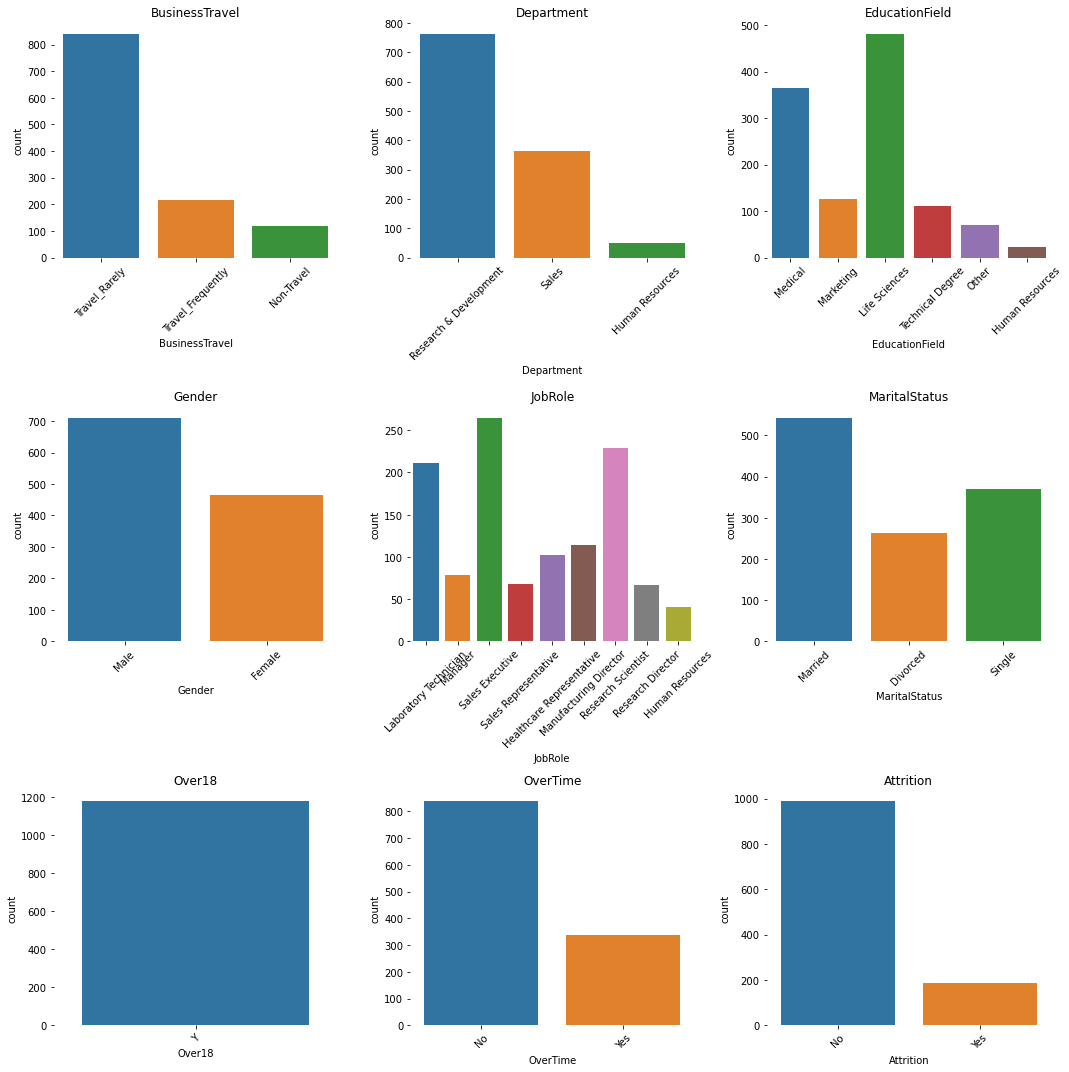

In [14]:
# Kategorik verilerin görselleştirilerek incelenmesi

num_rows = 3
num_cols = 3
fig, ax = plt.subplots(num_cols, num_rows, figsize=(15, 15))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(cat_features):
        feature = cat_features[i]
        plot = sns.countplot(x=feature, data=train, ax=ax[row,col])
        plot.set_title(feature)
        plot.set_xticklabels(plot.get_xticklabels(),rotation = 45)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- BusinessTravel dengesiz bir dağılım görülmektedir.
- Department kolonunda dengesiz bir dağılım bulunmakta.
- JobRole göre Laboratory Tec, Sales Excutive ve Research Scientist  alanlarında daha fazla kişi çalıştığı öne çıkmaktadır.
- Overtime kolonunda  yes diyen kişiler daha az Attrition üzerinde bir etkisi olabilir.
- Attrition kolonunda görülmektedir ki işten ayrılmayacak olanların sayısı çok daha fazladır. Bu nedenle verinin dengesiz bir     veri olduğu ortaya çıkmaktadır.

#### Numerik Kolonların Değer Dağılımlarının Görselleştirilmesi

In [15]:
# Numerik verilerin belirlenmesi.

train.dtypes[train.dtypes == 'int64']

Age                         int64
DailyRate                   int64
DistanceFromHome            int64
Education                   int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobSatisfaction             int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

C:\Users\eyupb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\eyupb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


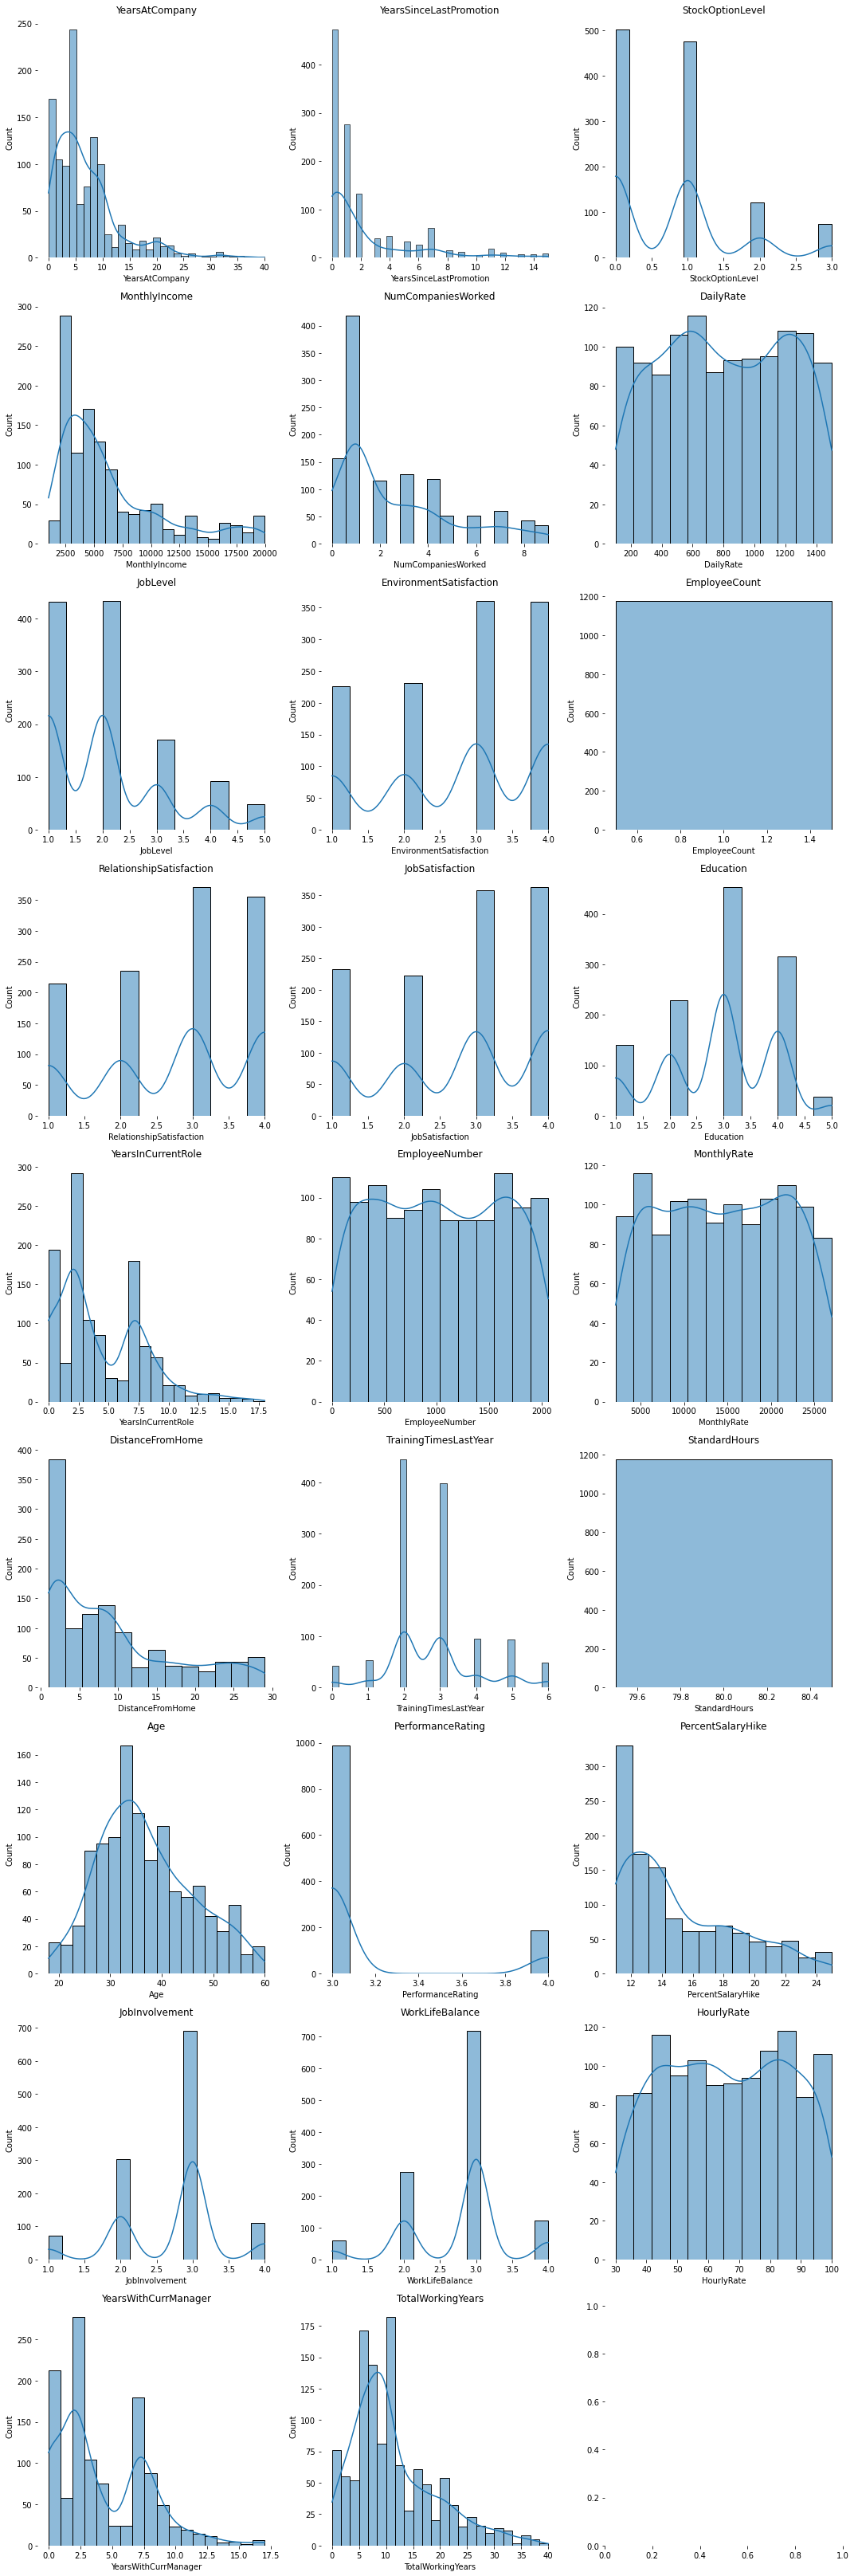

In [16]:
# Kategorik verilerin Train verisinden düşürülerek sadece Numerik verilerin kalmasının sağlanması.

cat_features = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime", "Attrition"]
numeric_features = list(set(train.columns) - set(cat_features))

# Numerik verilerin görselleştirilmesi.

num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.histplot(x=feature, data=train, ax=ax[row,col], kde=True)
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

#### Yorumlar

- Montly Income 2500-7500 arası maaş alanların sayısı daha fazla.
- NumCompaniesWorked 0-2 arası sayıda şirkette çalışmış insan sayısı daha fazla.
- Training Times Last Year geçirilen süre 2 ve 3 yılda yoğunlaşmış durumda.
- Güncel iş rölünde geçirilen süre 2.5 ve 7.5 yıllara yoğunlaşmış durumda.
- StockOptionLevel 0 ve 1 de yoğunlamış durumda Attrition'u etkiliyor olabilir.
- TotalWorkingYears 0-10 yılları arasında daha yoğun şekilde görülmekte.
- Age 25-45 yaşında olan kişi sayısı fazla.
- DistanceFromHome 0-15 arasında evleri işyerine uzak olan kişilerin sayısı daha fazla Attrition'u etkileyebilir.
- YearsAtCompany 0-13 yıl arasında kişilerin sayıları daha fazla Attrition'u etkileyebilir.
- WorkinLifeBalance ve Education verileri benzer özellikler göstermekte Attrition üzerinde etkisi olabilir.
- JobLevel 1 ve 2 seviyesinde olan kişi sayısı daha fazla önemli olabilir.


### Bivariate Analysis

#### Kategorik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi 

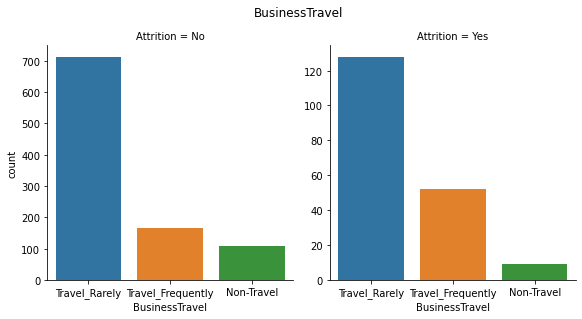

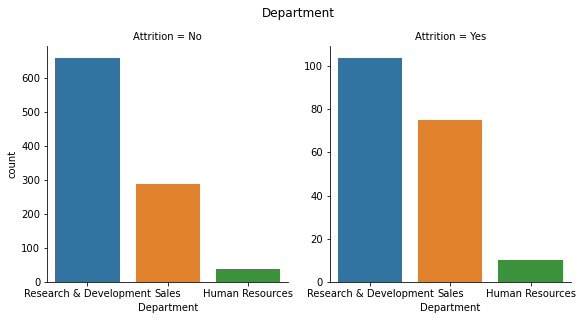

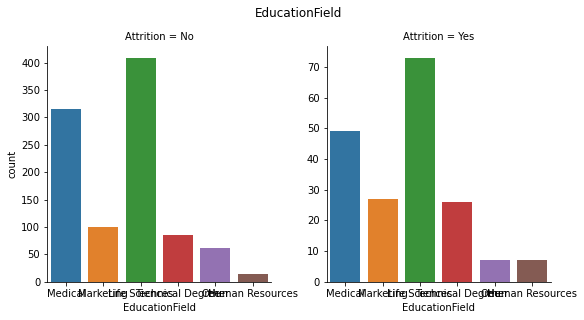

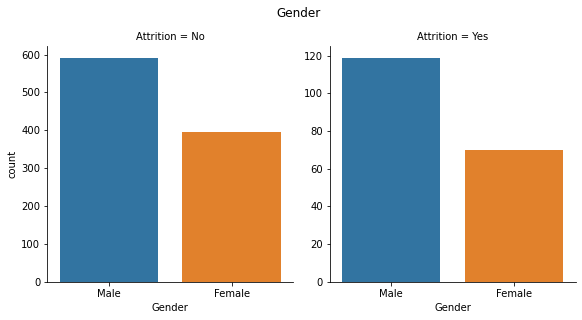

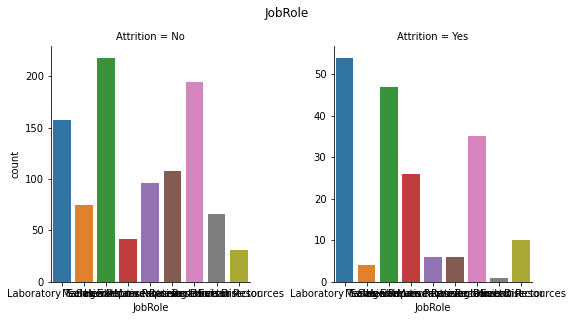

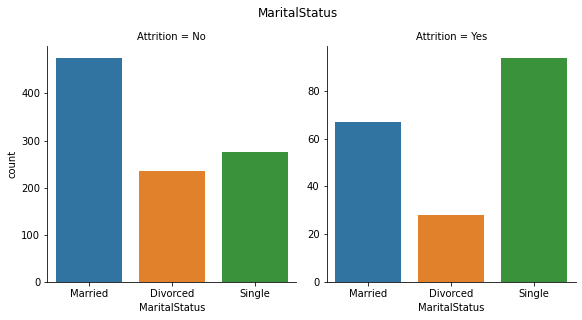

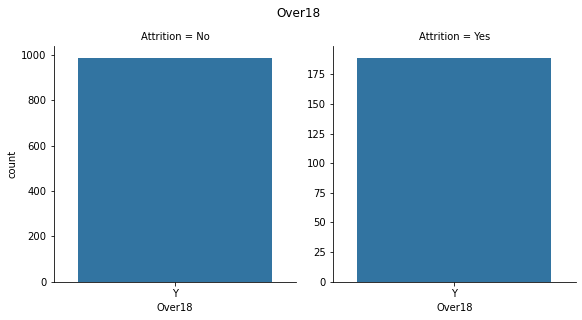

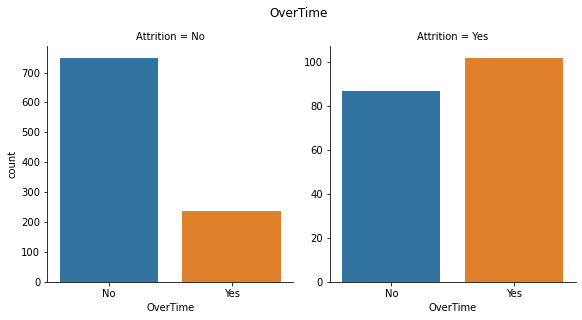

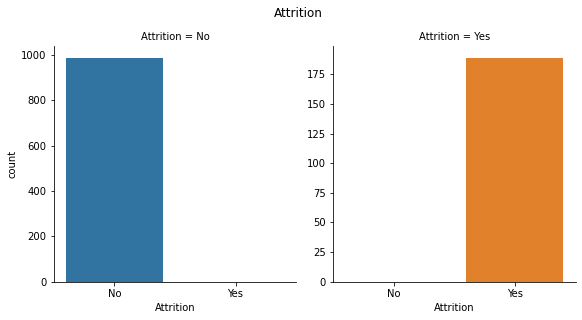

In [17]:
#Kategorik türde olan verilerin Attrition üzerindeki etikinin incelenmesi.

for feature in cat_features:
    fig = sns.catplot(x=feature, kind="count", col="Attrition", sharey=False, data=train, height=4, col_wrap=2)
    fig.fig.suptitle(feature, y=1.05)

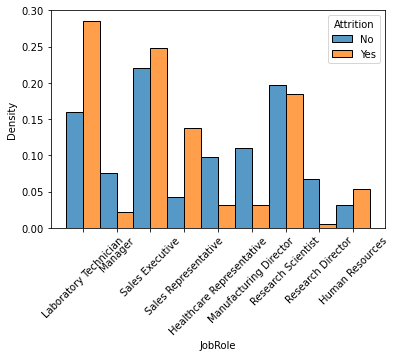

In [18]:

g = sns.histplot(data=train, x="JobRole", stat='density',  multiple='dodge', common_norm=False, hue='Attrition')
g.tick_params(axis='x', rotation=45)


### Yorum

- Nadir ve sıklıkla seyehat yapanlar işten ayrılmaya daha çok yatkın.
- Ev ile işyeri arasındaki uzaklık mesafesi Attrition'u etkiliyor gibi gözüküyor.
- Overtime kalanlar daha işten ayrılmaya daha yatkın gibi görülmekte.
- Çalıştıkları iş rollerine bakıldığında bazı alanlarda işten ayrılanlar daha çok olduğu görülmektedir.
- Marital Status işten ayrılmayı etkiliyor gibi görünüyor.
- Satış departmanında oransal olarak daha fazla ayrılan var.
- JobRole işten ayrılmada etkili olduğu anlaşılıyor.
- Marketing, Technical ve Human Resources alanlarında kişiler işlerinden ayrılmaya daha fazla eğimli.

#### Numerik Kolonlar ile Hedef Arasındaki İlişkilerin Görselleştirilmesi

C:\Users\eyupb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\eyupb\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


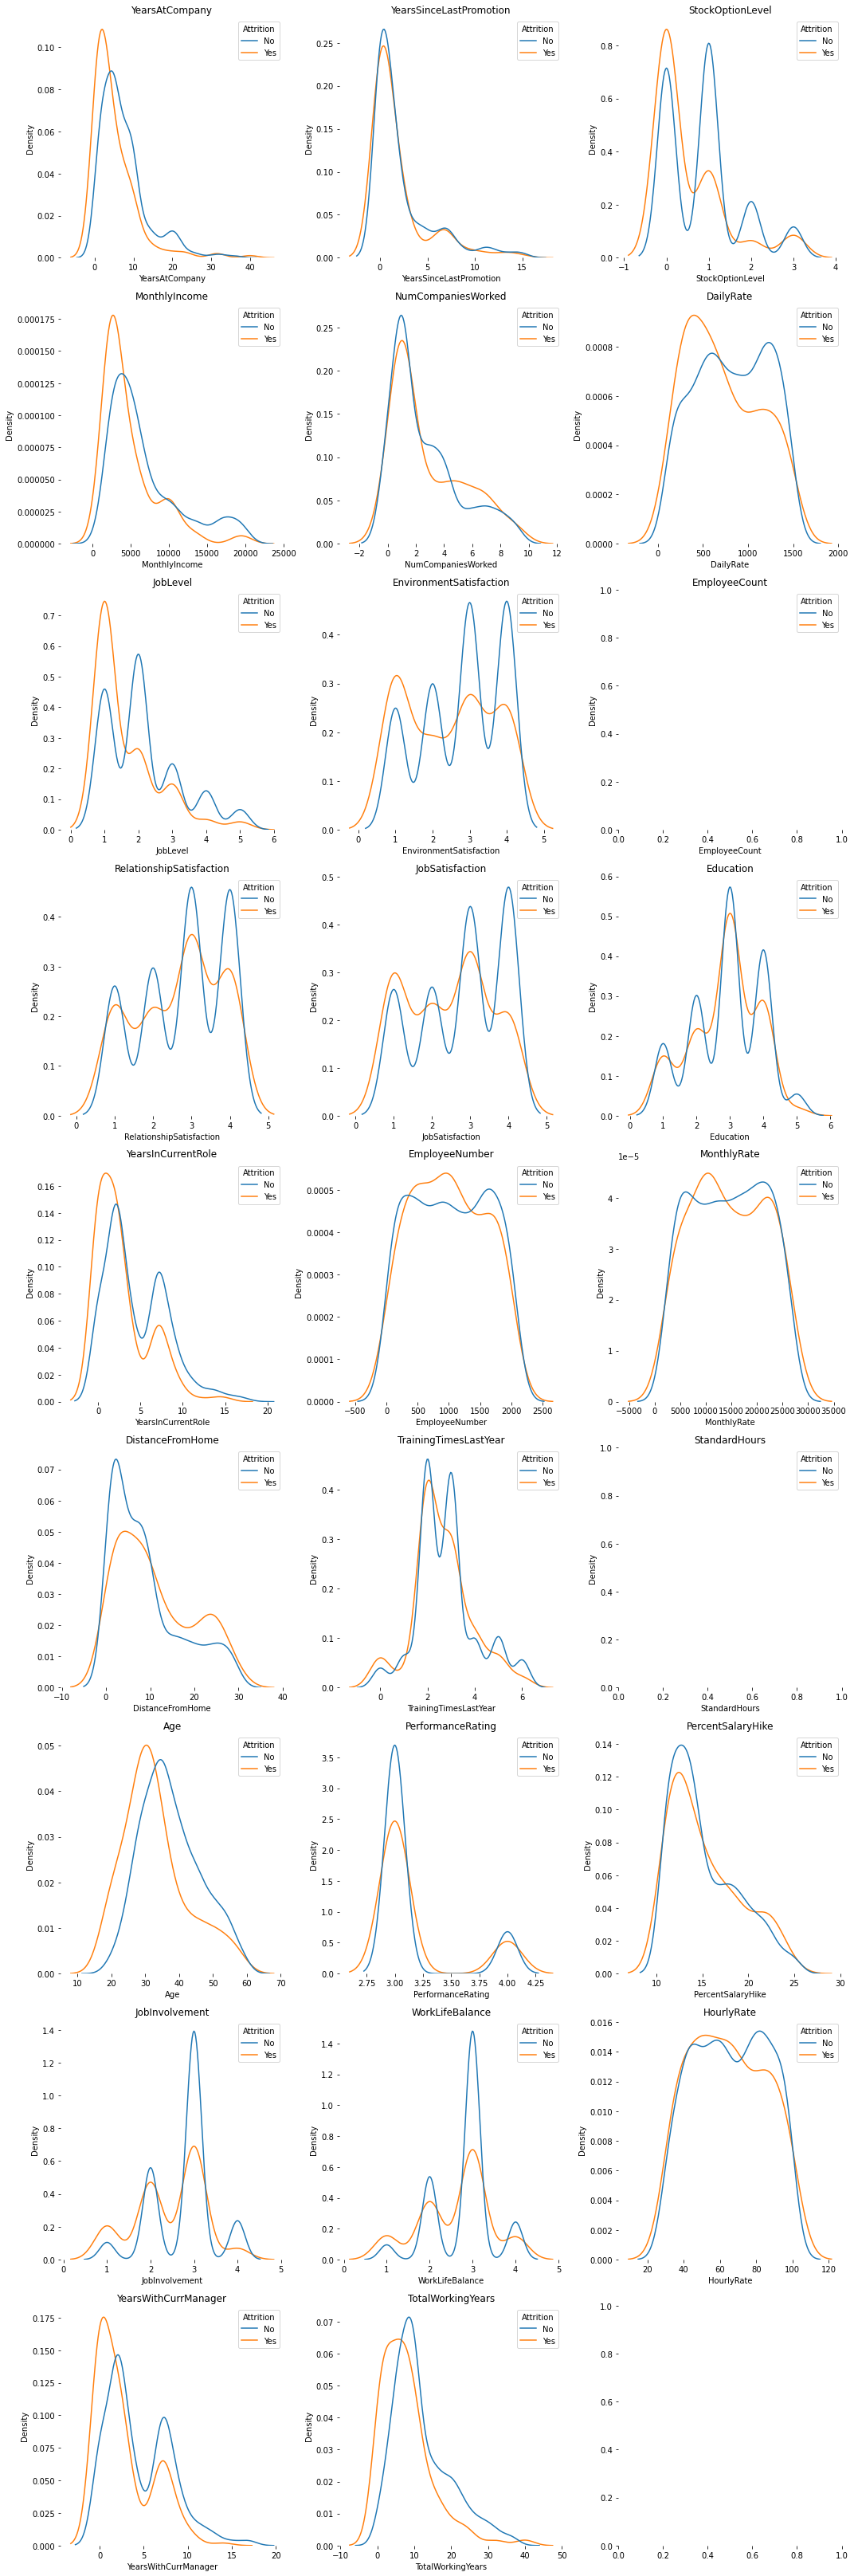

In [19]:
# Numerik kolonların Attrition üzerindeki etkilerinin incelenmesi.

num_rows = 9
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 45))
row = -1
for i in range(num_rows * num_cols):
    col = i % num_cols
    if col == 0:
        row += 1
    if i < len(numeric_features):
        feature = numeric_features[i]
        plot = sns.kdeplot(x=feature, data=train, common_norm = False, hue="Attrition", ax=ax[row,col])
        plot.set_title(feature)
        sns.despine(left=True, bottom=True)
        
fig.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='Density'>

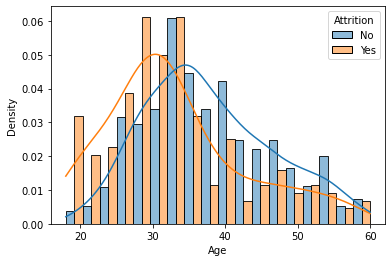

In [20]:
sns.histplot(data=train, x="Age", stat='density', kde=True, multiple='dodge', common_norm=False, hue='Attrition')

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

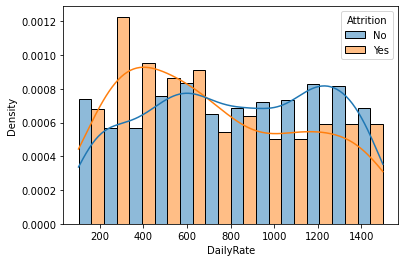

In [21]:
sns.histplot(data=train, x="DailyRate", stat='density', kde=True, multiple='dodge', common_norm=False, hue='Attrition')

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

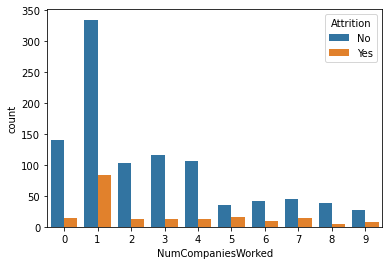

In [22]:
sns.countplot(data=train, x="NumCompaniesWorked", hue='Attrition')

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

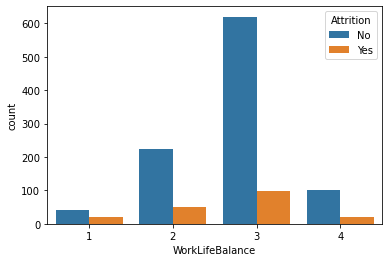

In [23]:
sns.countplot(data=train, x="WorkLifeBalance", hue='Attrition')

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

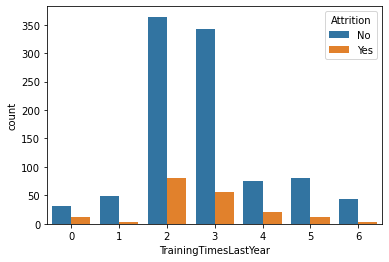

In [24]:
sns.countplot(data=train, x="TrainingTimesLastYear", hue='Attrition')

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

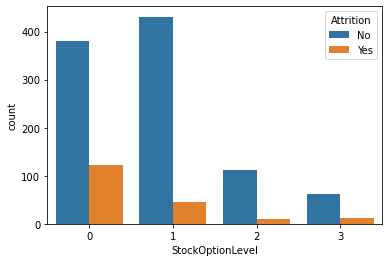

In [25]:
sns.countplot(data=train, x="StockOptionLevel", hue='Attrition')

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

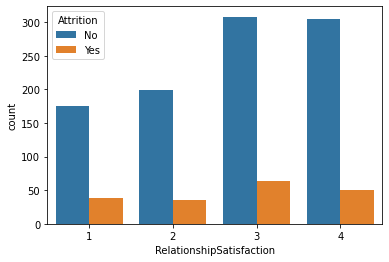

In [26]:
sns.countplot(data=train, x="RelationshipSatisfaction", hue='Attrition')

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

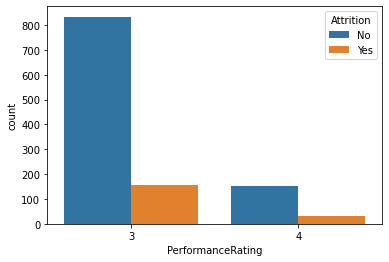

In [27]:
sns.countplot(data=train, x="PerformanceRating", hue='Attrition')

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

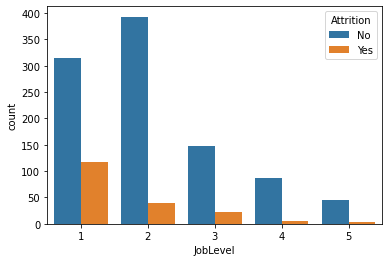

In [28]:
sns.countplot(data=train, x="JobLevel", hue='Attrition')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

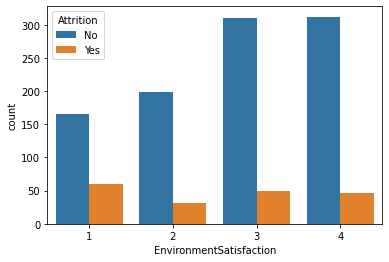

In [29]:
sns.countplot(data=train, x="EnvironmentSatisfaction", hue='Attrition')

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

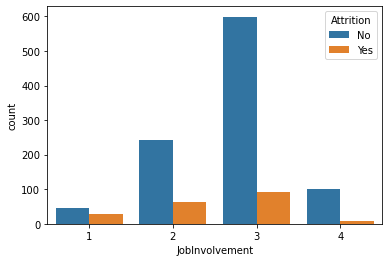

In [30]:
sns.countplot(data=train, x="JobInvolvement", hue='Attrition')

<AxesSubplot:xlabel='Education', ylabel='count'>

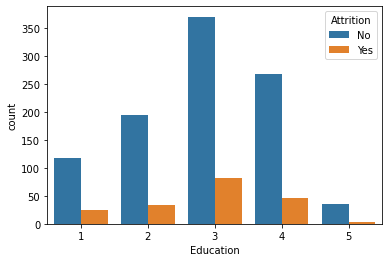

In [31]:
sns.countplot(data=train, x="Education", hue='Attrition')

#### Yorumlar

- 35 yaşından küçük olanlar işten ayrılmaya daha fazla eğimli olduğu görülmekte.
- Jobinvolment da 2 nin altında kalanlar  işten ayrılmaya yatkın olduğu anlaşılmaktadır.
- WorkinBalance 1 olan kişilerin Attrition üzerinde etkisi olabilir.
- Joblevel 1 olan kişilerin Attrition üzerinde etkisi olabilir.
- YearsatCompany daha az süre geçirenler işten ayırılmaya daha yatkın.
- Totolworking süresi az olanlar işten ayrılmaya daha yatkın.
- Aylık geliri 5000 den aşağı olanlarda Attrition üzerinde etkisi olduğu görülmektedir.
- Aynı kademede geçirilen süre Attrition etkilemekte.


### Multivariate Analysis

#### Correlation Matrix

In [32]:
# Kolonların kolerasyonunu inceleyerek gereksiz olanların silinmesi veya yeni bir öznitelik yaratılması.

from sklearn import preprocessing
import matplotlib.pyplot as plt

le = preprocessing.LabelEncoder()
columns_to_encode = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "Attrition"]

train_copy = train.copy()
train_copy[columns_to_encode] = train_copy[columns_to_encode].apply(le.fit_transform)

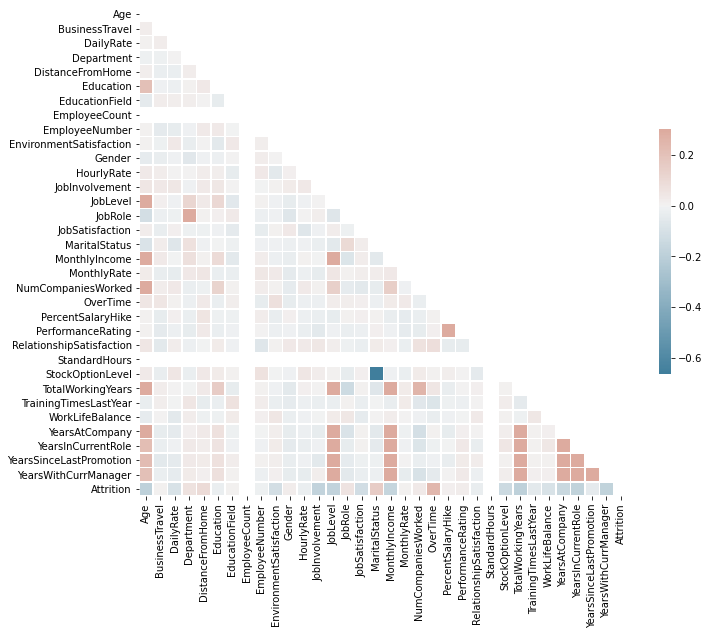

In [33]:
# Kolonların kolerasyon matrisi ile gösterilmesi.

corr = train_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Farklı Kolonların Etkileşiminin Görselleştirilmesi

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

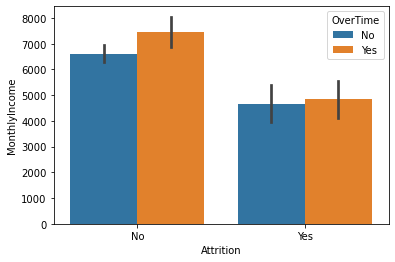

In [34]:
#Fazla mesai ile maas arasındaki ilişki önemli mi?
#Overtime: Binary, Categorik
#Montlyincome: Continouos
#Attrition: Binary, Categorik
sns.barplot(data=train, x="Attrition", y="MonthlyIncome", hue="OverTime")

### Yorum
- Fazla mesai ile maaş arasındaki ilişkiye bakıldığında Attrition etkilemediği görülmekte.

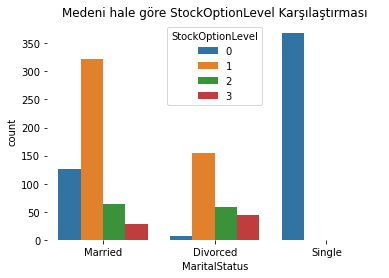

In [35]:
# MaritalStatus ile StockOptionLevel arasında ilişki var mı? 
# MaritalStatus: Binary, Categorik
# StockOptionLevel: Continous, Categorik
# Atrrition: Binary, Categorik

sns.countplot(x="MaritalStatus", hue="StockOptionLevel", data=train).set_title("Medeni hale göre StockOptionLevel Karşılaştırması")
sns.despine(left=True, bottom=True)

### Yorum
- MaritalStatus ile StockOptionLevel arasındaki ilişkiye bakıldığında bekar kişiler StockOptionLevel hiç olmadığı görülmekte.

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

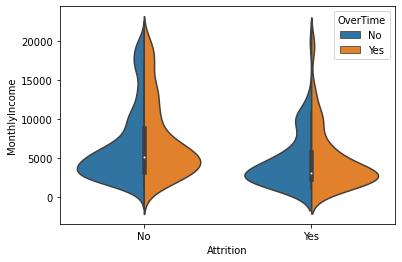

In [36]:
# MonthlyIncome ile OverTime arasındaki ilişkinin Attrition üzerindeki etkisi var mı?
# MonthlyIncome: Binary, Categorik
# OverTime: Binary, Categorik
# Attrition: Binary, Categorik

sns.violinplot(x="Attrition", y="MonthlyIncome", data=train, hue='OverTime', split=True)

### Yorum
- MonthlyIncome ile OverTime arasındaki ilişkiye bakıldığında bariz bir çıkarım yapılamamıştır.

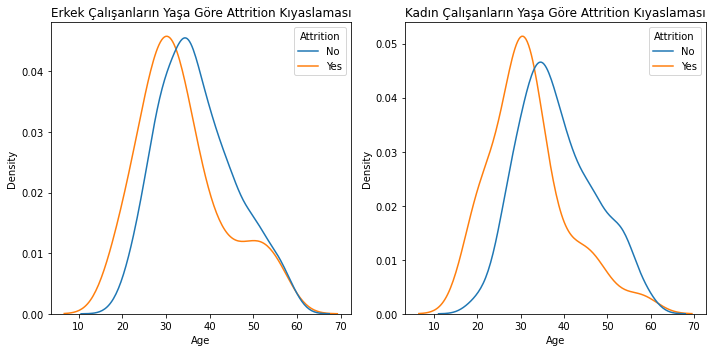

In [37]:
# Kişilerin cinsiyetlerine ve yaşlarına göre Attrition üzerindeki etkilerinin incelenmesi.
# Gender: Binary, Categorik
# Age: Contiunos
# Attrition: Binary, Categorik

fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.kdeplot(data=train[train["Gender"] == "Male"], ax=ax[0], common_norm = False, x="Age", hue='Attrition').set_title('Erkek Çalışanların Yaşa Göre Attrition Kıyaslaması')
sns.kdeplot(data=train[train["Gender"] == "Female"], ax=ax[1], common_norm = False, x="Age", hue='Attrition').set_title('Kadın Çalışanların Yaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

### Yorum
- Cinsiyetin Attrition üzerinde bir ilişki gözlenmemiş olup ancak yaşın Attrition üzerinde bir etkisi oluduğu görülmektedir. Yaşı genç olanlar işten ayrılmaya daha fazla yatkın.

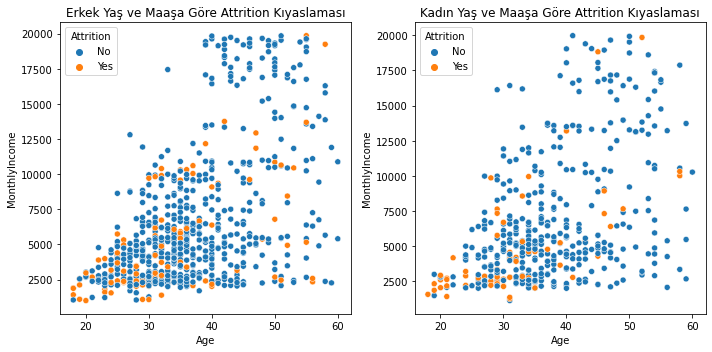

In [38]:
# Kişilerin cinsiyetlerine, yaşlarına ve maaşlarına göre Attrition üzerindeki etkilerinin incelenmesi.
# Gender: Binary, Categorik
# Age: Contiunos
# MontlyIncome: Contiunos
# Attrition: Binary, Categorik

fig, ax = plt.subplots(1,2, figsize=(10, 5))

sns.scatterplot(data=train[train["Gender"] == "Male"], ax=ax[0], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Erkek Yaş ve Maaşa Göre Attrition Kıyaslaması')
sns.scatterplot(data=train[train["Gender"] == "Female"], ax=ax[1], x="Age", y="MonthlyIncome", hue='Attrition').set_title('Kadın Yaş ve Maaşa Göre Attrition Kıyaslaması')
plt.tight_layout()

### Yorum

* Kadın çalışanların yaşı arttıkça attrition oranı düşmekte.
* Yaşa göre alınan maaşın attrition üzerinde belirgin bir etkisi bulunmamakta.

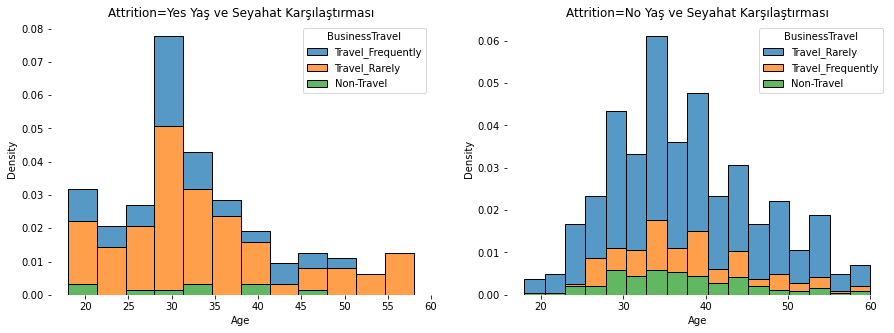

In [39]:
# Yaş ve seyahatın Attrition üzerindeki etkisinin incelenmesi.
# BusinessTravel: Binary, Categorik
# Age: Contiunos
# Attrition: Binary, Categorik

fig, ax = plt.subplots(1,2, figsize=(15, 5))

fig1 = sns.histplot(data=train[train["Attrition"] == "Yes"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[0])
fig2 = sns.histplot(data=train[train["Attrition"] == "No"], x="Age", hue="BusinessTravel", multiple="stack", stat="density", ax=ax[1])

fig1.set_title("Attrition=Yes Yaş ve Seyahat Karşılaştırması")
fig2.set_title("Attrition=No Yaş ve Seyahat Karşılaştırması")

sns.despine(left=True, bottom=True)

### Yorum
- Rarely veya Frequently seyahat oranı çok yüksek olduğu için çıkarım yapmak oldukça zor. Ancak seyahat etmeyenlerin attrition oranının daha düşük olduğu görülmekte. Fakat yaşa bağlı olarak BusinessTravel kolonunun Attrition üzerinde ciddi bir etkisi olduğu görülmemekte.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

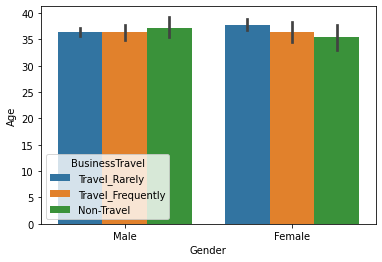

In [40]:
#Yaşına ve cinsiyetine göre gezmesi önemli mi?
#Age:continous
#Gender:Binary, Categorik
#BusinessTravel:Binary, Categorik

sns.barplot(data=train, x="Gender", y="Age", hue="BusinessTravel")


### Yorum
- Bir ilişki görülmemekte.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

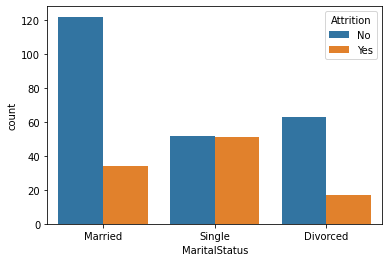

In [41]:
# MaritalStatus ve OverTime arasındaki ilişkinin Attrition üzerindeki ilişki önemli mi?
# MaritalStatus: Binary, Categorik
# OverTime: Binary, Categorik
# Attrition: Binary, Categorik

sns.countplot(data=train[train['OverTime']== "Yes"], x="MaritalStatus", hue="Attrition")

### Yorum

- Bekarlardaki OverTime yapanların Attrition oranı daha yüksek olduğu görülmektedir.

<AxesSubplot:xlabel='BusinessTravel', ylabel='DistanceFromHome'>

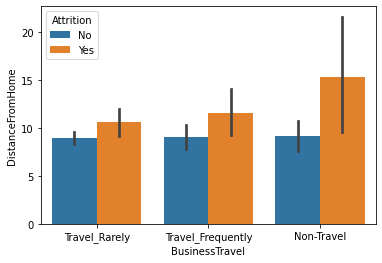

In [42]:
# BusinessTravel ve DistanceFromHome arasındaki ilişkinin Attrition üzerindeki etikisi önemli mi?
# BusinessTravel:Binary, Categorik
# DistanceFromHome: Continous
# Attrition: Binary, Categorik

sns.barplot(data=train, x="BusinessTravel", y="DistanceFromHome", hue="Attrition")

### Yorum

- Sık seyehat etmeyenler ve evleri işten uzak olanların Attrition oranı daha yüksek olduğu görülmektedir.

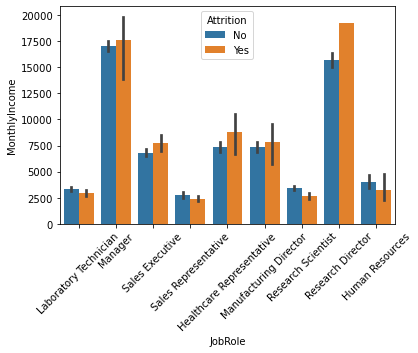

In [43]:
#Jobrole: Categorik, Binary
#MonthlyIncome: Con
#Attrition: Cetigorik

g = sns.barplot(data=train, x="JobRole", y="MonthlyIncome", hue="Attrition")
g.tick_params(axis='x', rotation=45)



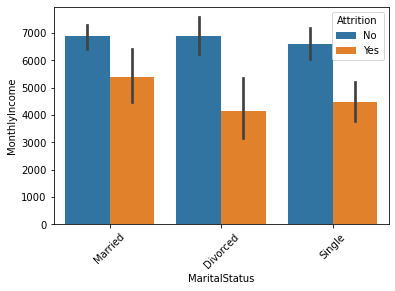

In [44]:
#MaritalStatus
#MontlIncome
#Att

g = sns.barplot(data=train, x="MaritalStatus", y="MonthlyIncome", hue="Attrition")
g.tick_params(axis='x', rotation=45)

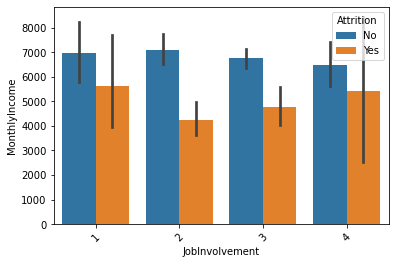

In [45]:
#Jobinvolment
#MonthlyIncome
#Att
g = sns.barplot(data=train, x="JobInvolvement", y="MonthlyIncome", hue="Attrition")
g.tick_params(axis='x', rotation=45)

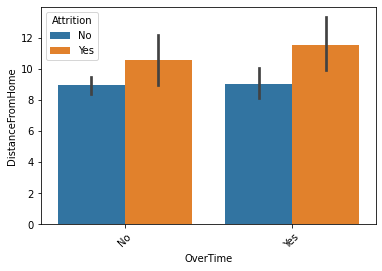

In [46]:
#OverTime
#DistanceFrom
#Att
g = sns.barplot(data=train, x="OverTime", y="DistanceFromHome", hue="Attrition")
g.tick_params(axis='x', rotation=45)

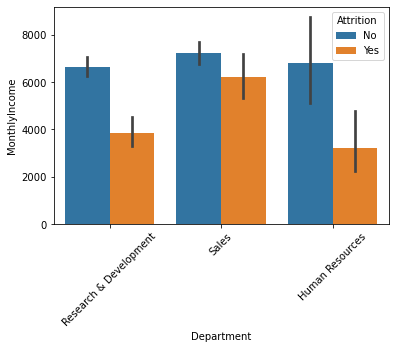

In [47]:
g = sns.barplot(data=train, x="Department", y="MonthlyIncome", hue="Attrition")
g.tick_params(axis='x', rotation=45)

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


## Veri Düzenleme

### Gereksiz Kolonların Silinmesi

In [48]:
# Train verisinin kopyalanması.

train_cleaned = train.copy()

# Test verisinin kopyalanması.

test_cleaned = test.copy()

# Validation verisinin kopyalanması.

validation_cleaned = validation.copy()

In [49]:
# Daha önce yaptığımız incelemeler sonucunda verilerden çıkarılacak kolonların 
#  belirlenerek veri setlerinden kolonların silinmesi.

columns_drop = ["Over18","EmployeeCount", 'EmployeeNumber', 'StandardHours']

In [50]:
# Train verisinden gereksiz kolonların silinmesi.

train_cleaned.drop(columns=columns_drop, inplace= True)

# Test verisinden gereksiz kolonların silinmesi.

test_cleaned.drop(columns=columns_drop, inplace= True)

# Validation verisinden gereksiz kolonların silinmesi.

validation_cleaned.drop(columns=columns_drop, inplace= True)

##  Kategorik olarak verilen değerlerin numerik formata dönüştürülmesi

- BusinessTravel ,Department, EducationField, MaritalStatus metin olarak verilmis değerlerin numerik hale dönüştürülmesi.
- Aşağıda verilen üç yöntem ile bu yapılabilir.

### 1- Label Encoder kullanarak Metin olarak verilen verilerin numerik hale getirilmesi

In [51]:
# Öncelikle gerekli kütüphenin import edilmesi.
# from sklearn import preprocessing

# Train verisinin bu yöntem ile Encoder edilmesi.

#le = preprocessing.LabelEncoder()
#train_cleaned['Department'] = le.fit_transform(train_cleaned['Department'])
#train_cleaned['EducationField'] = le.fit_transform(train_cleaned['EducationField'])
#train_cleaned['MaritalStatus'] = le.fit_transform(train_cleaned['MaritalStatus'])
#train_cleaned['JobRole'] = le.fit_transform(train_cleaned['JobRole'])


In [52]:
# Yapılan işlemin kontröl edilmesi.

#train_cleaned['Department']

In [53]:
#train_cleaned['BusinessTravel'].unique()

### 2- Map yöntemi ile metin olarak verilmiş verileri numerik hale getirmek

In [54]:
# Map yöntemi ile Train verindeki metin olarak verilerin düzenlenmesi.

#train_cleaned['BusinessTravel'] = train_cleaned['BusinessTravel'].map(
#    {
#        'Travel_Rarely': 1,
 #       'Travel_Frequently': 2,
 #       'Non-Travel': 0
 #   })

In [55]:
# Yapılan işlemin kontrol edilmesi.

#train_cleaned['BusinessTravel'].unique()

In [56]:
#train_cleaned['BusinessTravel']

In [57]:
#train_cleaned['JobRole'].unique()

In [58]:
# Gender kolonunun dönüştürülmesi.

#train_cleaned['Gender'] = train_cleaned['Gender'].map({'Male': 1, 'Female': 0})

In [59]:
# OverTime kolonunun dönüştürülmesi.

#train_cleaned['OverTime'] = train_cleaned['OverTime'].map({'Yes': 1, 'No': 0})

In [60]:
# Test, Train ve Validation verisinda bulunan Attrition kolonunun Map yöntemi ile Binary hale getirilmesi.

train_cleaned['Attrition'] = train_cleaned['Attrition'].map({'Yes': 1, 'No': 0})
test_cleaned['Attrition'] = test_cleaned['Attrition'].map({'Yes': 1, 'No': 0})
validation_cleaned['Attrition'] = validation_cleaned['Attrition'].map({'Yes': 1, 'No': 0})

In [61]:
# Yapılan dönüşümlerin Kontrol edilmesi.

train_cleaned.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,30,Travel_Rarely,911,Research & Development,1,2,Medical,4,Male,76,...,3,0,12,6,2,12,8,1,7,0
1,48,Travel_Frequently,365,Research & Development,4,5,Medical,3,Male,89,...,2,1,23,3,3,2,2,2,2,0
2,27,Travel_Rarely,1469,Research & Development,1,2,Medical,4,Male,82,...,2,1,5,2,3,5,2,0,4,0
3,34,Travel_Rarely,704,Sales,28,3,Marketing,4,Female,95,...,4,2,8,2,3,8,7,1,7,0
4,23,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,33,...,1,1,1,3,2,1,0,1,0,1


In [62]:
# Yapılan işlemlerin kontrol edilmesi.

test_cleaned.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,21,Travel_Rarely,1343,Sales,22,1,Technical Degree,3,Male,49,...,3,0,3,2,3,3,2,1,2,0
1,24,Travel_Rarely,693,Sales,3,2,Life Sciences,1,Female,65,...,1,0,4,3,3,2,2,2,0,1
2,42,Travel_Rarely,933,Research & Development,29,3,Life Sciences,2,Male,98,...,4,1,10,3,2,9,8,7,8,0
3,46,Travel_Rarely,168,Sales,4,2,Marketing,4,Female,33,...,3,1,26,2,3,11,4,0,8,0
4,35,Travel_Frequently,880,Sales,12,4,Other,4,Male,36,...,1,0,13,2,4,11,9,6,7,1


## YearsAtCompany kategorik hale getirilmesi:

In [63]:
# Şirkette geçirilen yılın belirli aralıklar belirlenerek kategorik hale getirilmesi.
# Train verisindeki kolonunun üzerinde işlemler yapılarak yeni kolonun eklenmesi.

bins = pd.IntervalIndex.from_tuples([(-1,5),(5,10),(10,15),(15,100)])
cat_YearsAtCompany = pd.cut(train_cleaned["YearsAtCompany"].to_list(), bins)
cat_YearsAtCompany.categories = [0,1,2,3]
train_cleaned["YearsAtCompanyCat"] = cat_YearsAtCompany

In [64]:
# Test verisindeki kolonunun üzerinde işlemler yapılarak yeni kolonun eklenmesi.

bins = pd.IntervalIndex.from_tuples([(-1,5),(5,10),(10,15),(15,100)])
cat_YearsAtCompany = pd.cut(test_cleaned["YearsAtCompany"].to_list(), bins)
cat_YearsAtCompany.categories = [0,1,2,3]
test_cleaned["YearsAtCompanyCat"] = cat_YearsAtCompany

In [65]:
# Validation verisindeki kolonunun üzerinde işlemler yapılarak yeni kolonun eklenmesi.

bins = pd.IntervalIndex.from_tuples([(-1,5),(5,10),(10,15),(15,100)])
cat_YearsAtCompany = pd.cut(validation_cleaned["YearsAtCompany"].to_list(), bins)
cat_YearsAtCompany.categories = [0,1,2,3]
validation_cleaned["YearsAtCompanyCat"] = cat_YearsAtCompany

In [66]:
# YearsAtCompany kategorik hale getirilmiş olan kolonun eklenmesi sonrasi eski kolonun silinmesi 
# Train verisinden YearsAtCompany silinmesi.

train_cleaned.drop(columns=["YearsAtCompany"], inplace=True, axis=1)
# Test verisinden YearsAtCompany silinmesi.
test_cleaned.drop(columns=["YearsAtCompany"], inplace=True, axis=1)
# Validation verisinden YearsAtCompany silinmesi.
validation_cleaned.drop(columns=["YearsAtCompany"], inplace=True, axis=1)

In [67]:
# YearsAtCompanyCat kolonun Attrition ile arasındaki kolorasyonun değerine bakma.

train_cleaned["YearsAtCompanyCat"].corr(train_cleaned["Attrition"])

-0.14172852265465513

### 3- One Hot Encoding yöntemi ile Metinsel olarak verilen kategorik verilerin Binary hale getirilmesi


In [68]:
# One Hot Encoding yöntemi aracılığı ile kategorik verilerin Binary hale getirilmesi.

# Binary hale getirilecek kolonların seçimi.

columns_to_encode= [
    "BusinessTravel", "Department", "EducationField",
    "Gender", "JobRole", "MaritalStatus", "OverTime"
]

In [69]:
# Gerekli kütüphanenin import edilmesi.

from sklearn.preprocessing import OneHotEncoder

# Train verisinde gerekli düzenlemelerin yapılması.

encoder = OneHotEncoder(drop="if_binary")
encoder_df= pd.DataFrame(encoder.fit_transform(train_cleaned[columns_to_encode]).toarray()) # Binary hale getiricelek kolonların gönderilmesi
columns_names= encoder.get_feature_names(columns_to_encode) # Binary hale getirilmiş kolonların yeni hallerini değişkene atama.
columns_names

C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_Yes'], dtype=object)

In [70]:
encoder_df.columns = columns_names

In [71]:
# Binary hale getirilmiş olan eski kategorik verilerin silinmesi.

train_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)

# Kategorik verilerin binary hale getirilmiş versiyonlarının veriye eklenmesi.

train_cleaned = train_cleaned.join(encoder_df)

In [72]:
# Yukarıdaki işlemlerinin aynısının Test verisine uygulanması.

test_encoder_df = pd.DataFrame(encoder.transform(test_cleaned[columns_to_encode]).toarray())
column_names = encoder.get_feature_names(columns_to_encode)
test_encoder_df.columns = column_names
test_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)
test_cleaned = test_cleaned.join(test_encoder_df)

C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [73]:
# Yukarıdaki işlemlerinin aynısının Validation verisine uygulanması.

validation_encoder_df = pd.DataFrame(encoder.transform(validation_cleaned[columns_to_encode]).toarray())
column_names = encoder.get_feature_names(columns_to_encode)
validation_encoder_df.columns = column_names
validation_cleaned.drop(columns=columns_to_encode, inplace=True, axis=1)
validation_cleaned = validation_cleaned.join(validation_encoder_df)

C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
# Veri üzerinde yapılan işlemlerin FastApi de kullamak amacıyla yapılan uygulamaların indirilmesi.

import pickle
with open('one-hot-encoder.pkl','wb') as f :
    pickle.dump(encoder, f)

### Feature Exration Kontrölü

In [75]:
train_cleaned.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,30,911,1,2,4,76,3,1,2,3748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,48,365,4,5,3,89,2,4,4,15202,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,27,1469,1,2,4,82,3,1,2,3816,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,34,704,28,3,4,95,2,2,3,6712,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,23,638,9,3,4,33,3,1,1,1790,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [76]:
train_cleaned.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,2.724490,65.544218,2.714286,2.058673,2.723639,6484.924320,...,0.067177,0.096939,0.056973,0.194728,0.225340,0.057823,0.224490,0.461735,0.313776,0.288265
std,9.115610,402.627249,8.109130,1.030495,1.093398,20.202669,0.718154,1.094260,1.102100,4672.960274,...,0.250435,0.296000,0.231889,0.396160,0.417984,0.233508,0.417423,0.498746,0.464224,0.453148
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2902.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,802.000000,7.000000,3.000000,3.000000,65.000000,3.000000,2.000000,3.000000,4890.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1163.250000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8400.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
train_cleaned.dtypes

Age                                     int64
DailyRate                               int64
DistanceFromHome                        int64
Education                               int64
EnvironmentSatisfaction                 int64
HourlyRate                              int64
JobInvolvement                          int64
JobLevel                                int64
JobSatisfaction                         int64
MonthlyIncome                           int64
MonthlyRate                             int64
NumCompaniesWorked                      int64
PercentSalaryHike                       int64
PerformanceRating                       int64
RelationshipSatisfaction                int64
StockOptionLevel                        int64
TotalWorkingYears                       int64
TrainingTimesLastYear                   int64
WorkLifeBalance                         int64
YearsInCurrentRole                      int64
YearsSinceLastPromotion                 int64
YearsWithCurrManager              

In [78]:
test_cleaned.dtypes

Age                                     int64
DailyRate                               int64
DistanceFromHome                        int64
Education                               int64
EnvironmentSatisfaction                 int64
HourlyRate                              int64
JobInvolvement                          int64
JobLevel                                int64
JobSatisfaction                         int64
MonthlyIncome                           int64
MonthlyRate                             int64
NumCompaniesWorked                      int64
PercentSalaryHike                       int64
PerformanceRating                       int64
RelationshipSatisfaction                int64
StockOptionLevel                        int64
TotalWorkingYears                       int64
TrainingTimesLastYear                   int64
WorkLifeBalance                         int64
YearsInCurrentRole                      int64
YearsSinceLastPromotion                 int64
YearsWithCurrManager              

## Yeni Özniteliklerin Yaratılması (Mümkünse)

### Tecrube yili / calistgi sirket sayisi

In [79]:
# Tecrübe yılının çalıştığı şirket sayısına bölerek çıkan sonucun Attrition üzerindeki etkisinin incelenmesi.

# Train verisinde yeni özelliğin yaratılması.

train_cleaned['AvgAttrition'] = train_cleaned['TotalWorkingYears'] / (train_cleaned['NumCompaniesWorked'] + 1)

# Test verisinde yeni özelliğin yaratılması.

test_cleaned['AvgAttrition'] = test_cleaned['TotalWorkingYears'] / (test_cleaned['NumCompaniesWorked'] + 1)

# Validation verisinde yeni özelliğin yaratılması.

validation_cleaned['AvgAttrition'] = validation_cleaned['TotalWorkingYears'] / (validation_cleaned['NumCompaniesWorked'] + 1)

<AxesSubplot:xlabel='Attrition', ylabel='AvgAttrition'>

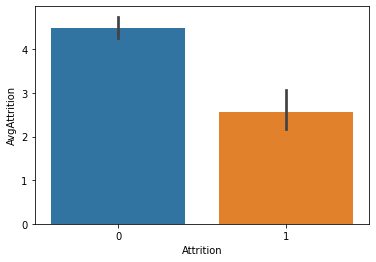

In [80]:
# AvgAttrition: Continous
# Attrition: Binary, Categorik

sns.barplot(x="Attrition", y='AvgAttrition', data=train_cleaned)

### Kisinin ayni tecrube seviyesine ile diğer insanlara göre maasinin durumu


In [81]:
# Train Verisinde düzenleme.

meanYearIncome = train_cleaned.groupby("TotalWorkingYears")["MonthlyIncome"].mean()
train_cleaned.groupby("TotalWorkingYears")["MonthlyIncome"].count()

train_cleaned["MeanYearIncome"] = train_cleaned.apply(
    lambda x: meanYearIncome[x["TotalWorkingYears"]], axis=1)

train_cleaned['OverYearIncomeAvg'] = train_cleaned.apply(
        lambda x: 1 if x['MonthlyIncome'] > x['MeanYearIncome'] else 0, axis=1
    ) 


In [82]:
# Test verisinde düzenleme.

meanYearIncome = test_cleaned.groupby("TotalWorkingYears")["MonthlyIncome"].mean()
test_cleaned.groupby("TotalWorkingYears")["MonthlyIncome"].count()

test_cleaned["MeanYearIncome"] = test_cleaned.apply(
    lambda x: meanYearIncome[x["TotalWorkingYears"]], axis=1)

test_cleaned['OverYearIncomeAvg'] = test_cleaned.apply(
        lambda x: 1 if x['MonthlyIncome'] > x['MeanYearIncome'] else 0, axis=1
    ) 

In [83]:
# Validation verisinde düzenleme.

meanYearIncome = validation_cleaned.groupby("TotalWorkingYears")["MonthlyIncome"].mean()
validation_cleaned.groupby("TotalWorkingYears")["MonthlyIncome"].count()

validation_cleaned["MeanYearIncome"] = validation_cleaned.apply(
    lambda x: meanYearIncome[x["TotalWorkingYears"]], axis=1)
validation_cleaned['OverYearIncomeAvg'] = validation_cleaned.apply(
        lambda x: 1 if x['MonthlyIncome'] > x['MeanYearIncome'] else 0, axis=1
    ) 

In [84]:
train_cleaned['OverYearIncomeAvg'].describe()

count    1176.000000
mean        0.456633
std         0.498328
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: OverYearIncomeAvg, dtype: float64

# Öznitelik Seçimi

- Öznitelikler azaltılarak veya seçilerek yapılabilir.
- 5 Yöntem ile yapılabilir.

### Kolerasyon matrixinde mutlak değerlerin seçilerek çıkarılma yöntemi

In [85]:
# Train verisin kolerasyonuna bakılması.

corr_matrix = train_cleaned.corr().abs()
corr_matrix.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AvgAttrition,MeanYearIncome,OverYearIncomeAvg
Age,1.000000,0.007605,0.016341,0.206040,0.006536,0.030195,0.044573,0.525635,0.020958,0.511113,...,0.136894,0.010985,0.189303,0.029533,0.073977,0.106034,0.048122,0.295667,0.624266,0.009678
DailyRate,0.007605,1.000000,0.023193,0.018384,0.039596,0.000717,0.044121,0.011012,0.013897,0.001130,...,0.012681,0.008417,0.004542,0.026476,0.048637,0.076061,0.008836,0.026561,0.016509,0.032341
DistanceFromHome,0.016341,0.023193,1.000000,0.037325,0.002459,0.024361,0.034573,0.031966,0.012575,0.010391,...,0.004864,0.040876,0.037924,0.011032,0.032050,0.024514,0.036233,0.032326,0.017034,0.005837
Education,0.206040,0.018384,0.037325,1.000000,0.047632,0.014320,0.041072,0.101166,0.009864,0.094824,...,0.019528,0.041574,0.085101,0.003836,0.004292,0.001162,0.026259,0.046503,0.112007,0.013597
EnvironmentSatisfaction,0.006536,0.039596,0.002459,0.047632,1.000000,0.052963,0.004800,0.010662,0.005268,0.017276,...,0.027687,0.018603,0.027551,0.021882,0.019349,0.001112,0.074544,0.010383,0.017831,0.010854


### -Kolerasyon üçgeninin oluşturulması

In [86]:
# Train verisinin kolorasyon üçgenin oluşturulması.

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

<ipython-input-86-a9ea74deda0d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AvgAttrition,MeanYearIncome,OverYearIncomeAvg
Age,NaN,0.007605,0.016341,0.206040,0.006536,0.030195,0.044573,0.525635,0.020958,0.511113,...,0.136894,0.010985,0.189303,0.029533,0.073977,0.106034,0.048122,0.295667,0.624266,0.009678
DailyRate,NaN,NaN,0.023193,0.018384,0.039596,0.000717,0.044121,0.011012,0.013897,0.001130,...,0.012681,0.008417,0.004542,0.026476,0.048637,0.076061,0.008836,0.026561,0.016509,0.032341
DistanceFromHome,NaN,NaN,NaN,0.037325,0.002459,0.024361,0.034573,0.031966,0.012575,0.010391,...,0.004864,0.040876,0.037924,0.011032,0.032050,0.024514,0.036233,0.032326,0.017034,0.005837
Education,NaN,NaN,NaN,NaN,0.047632,0.014320,0.041072,0.101166,0.009864,0.094824,...,0.019528,0.041574,0.085101,0.003836,0.004292,0.001162,0.026259,0.046503,0.112007,0.013597
EnvironmentSatisfaction,NaN,NaN,NaN,NaN,NaN,0.052963,0.004800,0.010662,0.005268,0.017276,...,0.027687,0.018603,0.027551,0.021882,0.019349,0.001112,0.074544,0.010383,0.017831,0.010854


In [87]:
# Özniteliklerin silinme threshold'u belirlenmesi.
# Bu öznitelikler sadece tek boyutta bakılıyor. Nonlineeri anlayamaz.

threshold = 0.8

In [88]:
# Thresholdun üzerindeki korelasyonların seçilerek silinmesi.

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('Silinecek kolon sayısı %d :' % (len(to_drop)))
print(to_drop)

Silinecek kolon sayısı 5 :
['MonthlyIncome', 'Department_Sales', 'JobRole_Human Resources', 'JobRole_Sales Executive', 'MeanYearIncome']


In [89]:
# Thresholdun üzerinde kalan kolonların silinmesi.

selection1 = train_cleaned.drop(columns = to_drop)
selection1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,AvgAttrition,OverYearIncomeAvg
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.859694,804.922619,9.329082,2.897959,2.724490,65.544218,2.714286,2.058673,2.723639,14464.356293,...,0.096939,0.056973,0.194728,0.057823,0.224490,0.461735,0.313776,0.288265,4.184091,0.456633
std,9.115610,402.627249,8.109130,1.030495,1.093398,20.202669,0.718154,1.094260,1.102100,7146.269744,...,0.296000,0.231889,0.396160,0.233508,0.417423,0.498746,0.464224,0.453148,3.925013,0.498328
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2094.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,466.750000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,8307.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000
50%,35.000000,802.000000,7.000000,3.000000,3.000000,65.000000,3.000000,2.000000,3.000000,14465.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,43.000000,1163.250000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,20741.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,26999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,38.000000,1.000000


### Threshold göre Feature seçim yöntemi

In [90]:
# Kolorasyonu yüksek olan Feature seçme yöntemi.

# Gerekli kütüphanenin import edilmesi.
from sklearn.feature_selection import VarianceThreshold
#Threshold belirlenmesi.
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

# Attrition veriden çıkartılması.
selection2 = train_cleaned.drop(columns=['Attrition'])

# Verinin Modele göndrilerek seçilecek kolonların belirlenmesi.
selection2 = sel.fit_transform(selection2)

selection2

array([[3.00000000e+01, 9.11000000e+02, 1.00000000e+00, ...,
        6.00000000e+00, 6.03665714e+03, 0.00000000e+00],
       [4.80000000e+01, 3.65000000e+02, 4.00000000e+00, ...,
        7.66666667e+00, 1.43030556e+04, 1.00000000e+00],
       [2.70000000e+01, 1.46900000e+03, 1.00000000e+00, ...,
        2.50000000e+00, 3.48122222e+03, 1.00000000e+00],
       ...,
       [4.00000000e+01, 1.15100000e+03, 9.00000000e+00, ...,
        5.00000000e-01, 3.48122222e+03, 1.00000000e+00],
       [3.40000000e+01, 6.58000000e+02, 7.00000000e+00, ...,
        4.50000000e+00, 6.61872840e+03, 0.00000000e+00],
       [2.00000000e+01, 1.29000000e+02, 4.00000000e+00, ...,
        5.00000000e-01, 2.20213043e+03, 1.00000000e+00]])

In [91]:
# Train verisinin etiketinin Labels değişkenine atanması.

labels = train_cleaned['Attrition']
labels.head()

0    0
1    0
2    0
3    0
4    1
Name: Attrition, dtype: int64

### Veriyi en iyi şekilde ifade eden k kadar değerlerin seçilmesi yöntemi : Select k best

In [92]:
# Gönderilcek veriden etiket kolonunun çıkarılması.

selection3 = train_cleaned.drop(columns=['Attrition'])
selection3.shape

(1176, 52)

In [93]:
# Gerekli modelin import edilmesi.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Modelin değişkene tanımlanması ve parametrelerin girilmesi. K değeri en iyi kaç tane kolan seçmesi gerektiği belirtir.
# veri ve etiket değerleri gönderilerek en iyi kolonları belirler.
selection3 = SelectKBest(chi2, k=2).fit_transform(selection3, labels)

In [94]:
selection3

array([[ 3748.        ,  6036.65714286],
       [15202.        , 14303.05555556],
       [ 3816.        ,  3481.22222222],
       ...,
       [ 4876.        ,  3481.22222222],
       [ 6074.        ,  6618.72839506],
       [ 2973.        ,  2202.13043478]])

In [95]:
selection3.shape

(1176, 2)

### LinearSVC feature selection Yöntemi

In [96]:
# Gerekli modelin import edilmesi.

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Gönderilecek veriden etiket değerlerin silinmesi.

selection4 = train_cleaned.drop(columns=['Attrition'])
selection4.shape


(1176, 52)

In [97]:
#LinearSVC yöntemi veri ve etiket değerlerin gönderilmesi ile gönderilen etiket değerlerini en iyi temsil eden kolonları seçer.
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(selection4, labels)# C ceza kat sayısıdır.
model = SelectFromModel(lsvc, prefit=True) # modelin tahmin etmesi için çalıştırma
selection4 = model.transform(selection4)
selection4.shape

C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(1176, 17)

In [98]:
# LinearSvc yöntemi ile seçilen önemli kolonların index kolonlarının öğrenilmesi.
feature_idx = model.get_support()
# Yeni bir değişkene Train verisinin Etiket değerleri olmadan atanması.
new_train = train_cleaned.drop(columns=['Attrition'])
# Seçilen kolonların yeni değişkene atanması.
feature_name = new_train.columns[feature_idx]
feature_name

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'OverTime_Yes', 'AvgAttrition'],
      dtype='object')

### Tree-based feature selection yöntemi

In [99]:
# Ağaç karar yöntemine göre Önemli kolonların belirlenmesi.
# Gerekli kütüphanenin import edilmesi.

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Gönderilecek veriden etiket değerlerin silinmesi.
selection5 = train_cleaned.drop(columns=['Attrition'])
selection5.shape


(1176, 52)

In [100]:
# Modelin kurulması.
clf = ExtraTreesClassifier(n_estimators=50)# N değeri kaç tane tahmin olması gerektiği belirler.
clf = clf.fit(selection5, labels) # Modelin fit edilmesi.
clf.feature_importances_  # Kolonların önem değerlirinin gösterilmesi.

array([0.03584102, 0.03151998, 0.03186874, 0.02439726, 0.03409902,
       0.02355627, 0.03122249, 0.02671057, 0.02894077, 0.03270126,
       0.02489375, 0.02635994, 0.02407186, 0.01145567, 0.0271841 ,
       0.02371493, 0.03198235, 0.0221903 , 0.02939611, 0.02887919,
       0.0210447 , 0.02859802, 0.0137136 , 0.00486007, 0.01860886,
       0.01225116, 0.00329724, 0.00785606, 0.0096625 , 0.00503426,
       0.01471888, 0.00904299, 0.01388164, 0.00585495, 0.01115084,
       0.01639744, 0.00441756, 0.00385128, 0.01758961, 0.00246783,
       0.0053315 , 0.00199169, 0.01080599, 0.01042216, 0.01265444,
       0.01058153, 0.01369809, 0.02518339, 0.06348371, 0.02707493,
       0.02791404, 0.01557345])

In [101]:
model = SelectFromModel(clf, prefit=True)
selection5 = model.transform(selection5)
selection5.shape
selection5

C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[3.00000000e+01, 9.11000000e+02, 1.00000000e+00, ...,
        0.00000000e+00, 6.00000000e+00, 6.03665714e+03],
       [4.80000000e+01, 3.65000000e+02, 4.00000000e+00, ...,
        0.00000000e+00, 7.66666667e+00, 1.43030556e+04],
       [2.70000000e+01, 1.46900000e+03, 1.00000000e+00, ...,
        0.00000000e+00, 2.50000000e+00, 3.48122222e+03],
       ...,
       [4.00000000e+01, 1.15100000e+03, 9.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 3.48122222e+03],
       [3.40000000e+01, 6.58000000e+02, 7.00000000e+00, ...,
        1.00000000e+00, 4.50000000e+00, 6.61872840e+03],
       [2.00000000e+01, 1.29000000e+02, 4.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 2.20213043e+03]])

### Feature Selection as part of a pipeline: Eğitim modelini göre en iyi Feature seçme yöntemi

In [102]:
# Gerekli kütüphanelerin import edilmesi.
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# Gönderilecek veriden etiket değerlerin silinmesi.
selection6 = train_cleaned.drop(columns=['Attrition'])
selection6.shape

(1176, 52)

In [103]:
# Kullanılacak Eğitim modeli ile Feature seçim yöntemi gönderilerek en iyi featurelarin seçilmesi.
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC())),
  ('classification', RandomForestClassifier())
])

clf.fit(selection6, labels)# modelin eğitilmesi.
#clf.get_support()

C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC())),
                ('classification', RandomForestClassifier())])

In [104]:
# Model eğittikten sonra feature importance ölçülmektedir. 
# Özniteliklerin önemini model eğittikten sonra grafik olarak koyabiliriz.

###  Özelliklerin Seçimi

In [105]:
# Train, Test ve Validation verilerin manual bir şekilde feature seçilmiş olup bunlar 
#             modeli eğitmek ve test etmek için aşağıda gerekli düzenlemeler yapılmıştır.

# Train Verisinin düzenlenmesi.

train_data = train_cleaned[["Age",'WorkLifeBalance','Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',"HourlyRate",'OverTime_Yes','MaritalStatus_Married',
        'TotalWorkingYears',"MonthlyIncome","DistanceFromHome","DailyRate",'JobRole_Healthcare Representative',
       'JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Sales Executive',
       "JobInvolvement","YearsWithCurrManager","JobLevel","EnvironmentSatisfaction",'BusinessTravel_Non-Travel',
        'BusinessTravel_Travel_Rarely', 'Attrition','NumCompaniesWorked','YearsAtCompanyCat',
        'JobSatisfaction','YearsInCurrentRole','PercentSalaryHike','AvgAttrition']]

# Test Verisinin düzenlenmesi.

test_data = test_cleaned[["Age",'WorkLifeBalance','Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',"HourlyRate",'OverTime_Yes','MaritalStatus_Married',
        'TotalWorkingYears',"MonthlyIncome","DistanceFromHome","DailyRate",'JobRole_Healthcare Representative',
       'JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Sales Executive',
       "JobInvolvement","YearsWithCurrManager","JobLevel","EnvironmentSatisfaction",'BusinessTravel_Non-Travel',
        'BusinessTravel_Travel_Rarely','NumCompaniesWorked','YearsAtCompanyCat',
        'JobSatisfaction','YearsInCurrentRole','PercentSalaryHike','AvgAttrition']]

test_label = test_cleaned['Attrition']

# Validation Verisinin düzenlenmesi.

validation_data = validation_cleaned[["Age",'WorkLifeBalance','Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',"HourlyRate",'OverTime_Yes','MaritalStatus_Married',
        'TotalWorkingYears',"MonthlyIncome","DistanceFromHome","DailyRate",'JobRole_Healthcare Representative',
       'JobRole_Manager', 'JobRole_Manufacturing Director','JobRole_Research Director','JobRole_Sales Executive',
       "JobInvolvement","YearsWithCurrManager","JobLevel","EnvironmentSatisfaction",'BusinessTravel_Non-Travel',
        'BusinessTravel_Travel_Rarely','NumCompaniesWorked','YearsAtCompanyCat',
        'JobSatisfaction','YearsInCurrentRole','PercentSalaryHike','AvgAttrition']]

validation_label = validation_cleaned['Attrition']

## Model Eğitimi 

- Verininin model için bölünmesi ve hazırlanması.

In [106]:
# Train verisini model için etiket ve özelliklerinin ayırılması.

y_data = train_data['Attrition']
X_data = train_data.drop(columns=['Attrition'])

In [107]:
print(X_data.shape)
print(y_data.shape)
assert X_data.shape[0] == y_data.shape[0]

(1176, 29)
(1176,)


In [108]:
# Train verisini Model eğitiminde kullamak için öncellikle 
# Train ve test olarak ikiye bölerek modelimizi Train verisi ile eğittikden sonra Test verisi ile başarısını ölçeceğiz.

# Bölmek için gerekli Kütüphanelerin import edilmesi.

from sklearn.model_selection import train_test_split

# Verinin bölünmesi. Veri Test verisi %15 e Train verisi %85 olacak şekilde bölünmüştür. 

X_train, X_val, y_train, y_val = train_test_split(
    X_data.values,
    y_data.values,
    test_size = 0.15,
    stratify=y_data,
    random_state = 42
)

### Model Degerlendirme Metrikleri

In [109]:
# precision,recall ve f-measure metrik
# Binary Precision
# Modelin Başarı metriğini ölçmek için hazırlanan foksiyonlar aşağıdadır.

# Gerekli kütüphanenin import edilmesi.

from sklearn import metrics

# Metriklerinin fonksiyonlarının yazılması

def eval_clf(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    p = metrics.precision_score(y_true, y_pred)
    r = metrics.recall_score(y_true, y_pred)
    f1 = metrics.f1_score(y_true, y_pred)
    
    result = {
        'acc': acc,
        'p': p,
        'r': r,
        'f1': f1
    }
    
    return result


def eval_auc(y_true, y_prob):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_prob)
    precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_prob)
    
    roc_auc = metrics.auc(fpr, tpr)
    pr_auc = metrics.auc(recall, precision)
    
    result = {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc
    }
    
    return result

    
def eval_threshold(y_true, y_prob, threshold):
    y_pred = np.where(np.array(y_prob) > threshold, 1, 0)

    return eval_clf(y_true, y_pred)





# Model Egitimleri

### - Support Vektor Machine


In [110]:
#“Destek Vektör Makinesi” (SVM), her bir veri maddesini belirli bir koordinatın değeri olan her özelliğin değeri 
#ile birlikte n-boyutlu boşluğa (burada n sahip olduğunuz özelliklerin sayısı) bir nokta olarak çizilir. 
#Ardından, iki sınıftan oldukça iyi ayrım yapan hiper-düzlemi bularak sınıflandırma gerçekleştirilir.

# Train verimizi normalize ederek göndermemiz modelimizin daha iyi öğrenmesini sağlayacaktır. 
#Bu nedenle öncelikle normalize etmeliyiz.

# Gerekli kütüphanelerin import edilmesi.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()# Normalize fonsiyonun tanımlanması. Parametrede girilebilir.
X_train_scaled = sc.fit_transform(X_train) # Train verisinin gönderilmesi.
X_val_scaled = sc.transform(X_val) # Modelin test ederkende göndereceğimiz veriyi Normalize etmeliyiz. Test verisinin gönderilmesi.

In [111]:
# Support Vektör Machine modelinin import edilmesi.

from sklearn import svm
# Modelin kurulması ve Parametre değerlerinin girilmesi.
svm_model = svm.SVC(C=9.0, kernel='rbf',probability=True, class_weight={1:5},max_iter=8000 
               )
svm_model.fit(X_train_scaled, y_train) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = svm_model.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = svm_model.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred) # Modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(y_val, y_prob) # Roc_auc ve Pr_auc ile başarı değerlerini görme.
print(res_auc)


res_clf
{'acc': 0.8305084745762712, 'p': 0.45, 'r': 0.32142857142857145, 'f1': 0.375}
res_auc
{'roc_auc': 0.7365771812080537, 'pr_auc': 0.44759796061640844}


### Optimize edilmiş hali ile test edelim.

In [112]:
# Modelin parametlerinin optimize edilmiş hali ile başarı metriklerinin ölçülmesi.

svm_model_optimize = svm.SVC( C = 1, class_weight = {1: 4}, coef0 = 0.501, degree = 7, gamma = 'auto',
              kernel = 'poly', max_iter = 8000, probability = True 
               )# Modelin kurulması ve Parametre değerlerinin girilmesi.
svm_model_optimize.fit(X_train_scaled, y_train) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = svm_model_optimize.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = svm_model_optimize.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred) # Modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(y_val, y_prob) # Roc_auc ve Pr_auc ile başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.8305084745762712, 'p': 0.4375, 'r': 0.25, 'f1': 0.3181818181818182}
res_auc
{'roc_auc': 0.7217162032598274, 'pr_auc': 0.3587208462037067}


### Test_data ile Manuel şekilde ayarlanmış modelin başarısını ölçme.

In [113]:
# Train_data'sından ayrı olarak en başta olan Test_data ile modelin başarısının ölçülmesi.

# Test_data öncelikle Normalize etmeliyiz.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
test_dataScale = sc.transform(test_data)# Test_data normalize edilmesi.

y_pred = svm_model.predict(test_dataScale) # Test_data tahmin alma
y_prob_2d = svm_model.predict_proba(test_dataScale) # Test_data ile etiket değerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(test_label, y_pred) # Test_data ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(test_label, y_prob) # Test_data ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.7891156462585034, 'p': 0.29411764705882354, 'r': 0.20833333333333334, 'f1': 0.24390243902439027}
res_auc
{'roc_auc': 0.6050135501355014, 'pr_auc': 0.2705184960127458}


C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Random Forest Modeli

In [114]:
#Random forest algoritması ,denetimli sınıflandırma algoritmalarından biridir.
#Algoritma ,birden fazla karar ağacı üreterek sınıflandırma işlemi esnasında sınıflandırma değerini yükseltmeyi hedefler.
#Random forest algoritması birbirinden bağımsız olarak çalışan birçok karar ağacının bir araya gelerek aralarından en yüksek puan alan değerin seçilmesi işlemidir.




# Train verisinin normalize edilmesi.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [115]:
# Random Forest Modeli: 
# Algoritma ,birden fazla karar ağacı üreterek sınıflandırma işlemi esnasında sınıflandırma değerini yükseltmeyi hedefler. 
# Random Forest modelini import edilmesi.

from sklearn.ensemble import RandomForestClassifier

# Modelin kurulması ve parametre değerlinin girilmesi.

rfc_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rfc_model.fit(X_train_scaled, y_train) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = rfc_model.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = rfc_model.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred) # Test verisi ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)

print('res_auc')
res_auc = eval_auc(y_val, y_prob) # Test verisi ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.864406779661017, 'p': 0.7, 'r': 0.25, 'f1': 0.3684210526315789}
res_auc
{'roc_auc': 0.7625838926174497, 'pr_auc': 0.47193316667967933}


In [116]:
# Confusion_matrix ile modelin etiket değerlerinin ne kadarını doğru veya yanlış bildiğini görebiliriz.
from sklearn.metrics import confusion_matrix # Metriğin import edilmesi.
cm = confusion_matrix(y_val, y_pred)
cm

array([[146,   3],
       [ 21,   7]], dtype=int64)

### Optimize edilmiş hali ile test edilmesi.

In [117]:
# Hyper optimizasyon ile optimize edilmiş halini test verisi ile test edilmesi.

# Modelin kurulması ve parametre değerlinin girilmesi.

rfc_model_optimize = RandomForestClassifier(bootstrap = False, max_depth = 4, max_features = 'auto',
                                    min_samples_leaf = 1, min_samples_split = 2, n_estimators = 25)
rfc_model_optimize.fit(X_train_scaled, y_train) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = rfc_model_optimize.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = rfc_model_optimize.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred) # Test verisi ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)

print('res_auc')
res_auc = eval_auc(y_val, y_prob) # Test verisi ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.8418079096045198, 'p': 0.5, 'r': 0.07142857142857142, 'f1': 0.125}
res_auc
{'roc_auc': 0.6675455417066155, 'pr_auc': 0.3132223887965898}


### Test_data ile Manuel şekilde ayarlanmış modelin başarısını ölçme.

In [118]:
# Test_data normalize edilmesi.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
test_dataScale = sc.transform(test_data)

# Test_data'nın tahmin değerlerini almak için modele verilmesi.

y_pred = rfc_model.predict(test_dataScale) # Test_data tahmin alma
y_prob_2d = rfc_model.predict_proba(test_dataScale) # Test_data ile etiket değerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(test_label, y_pred) # Test_data ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)
print('res_auc')
res_auc = eval_auc(test_label, y_prob) # Test_data ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.8503401360544217, 'p': 0.6, 'r': 0.25, 'f1': 0.35294117647058826}
res_auc
{'roc_auc': 0.6444783197831979, 'pr_auc': 0.2992585162422119}


C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Logistic Regression

In [119]:
# Train verisinin normalize edilmesi.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [120]:
# Gönderilen verinin normalize edilmesi için kullanılan normalize modelinin FastApi de kullanılması sağlamak amacıyla indirilmesi.

import pickle
with open('sklearn-scalen.pkl','wb') as f :
    pickle.dump(sc, f)

In [121]:
# LogisticRegression : Sınıflandırma problemlerinde tercih edilen bir modeldir. İkili sınıflandırmada daha çok tercih edilir.

# Modelin import edilmesi.

from sklearn.linear_model import LogisticRegression

# Modelin kurulması ve Parametre değerlerinin girilmesi.

logReg = LogisticRegression(max_iter=5000,penalty='l2', C=4.281332398719396, random_state = 42,class_weight={1:5},
                           intercept_scaling = 1, solver='liblinear', multi_class='ovr', n_jobs=1)

logReg.fit(X_train_scaled, y_train) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = logReg.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = logReg.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma.
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred) # Test verisi ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)

print('res_auc')
res_auc = eval_auc(y_val, y_prob) # Test verisi ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.7796610169491526, 'p': 0.39215686274509803, 'r': 0.7142857142857143, 'f1': 0.5063291139240506}
res_auc
{'roc_auc': 0.8593000958772772, 'pr_auc': 0.6204278633211823}


In [122]:
# FastApi de kullanmak için LogisticRegression modelinin indirilmesi.
import pickle
with open('logistic_reg.pkl','wb') as f :
    pickle.dump(model, f)

Text(0, 0.5, 'TPR')

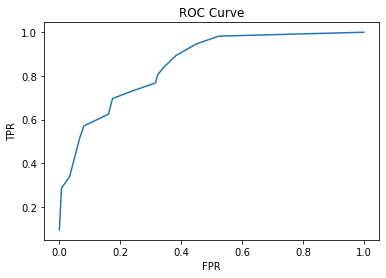

In [123]:
# Modelin başarı metriğinin grafiğinin çizdirilmesi.

from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_val, y_prob)
roc_auc = metrics.auc(fpr, tpr)

ax = sns.lineplot(x=fpr, y=tpr, ci=None)
ax.set_title('ROC Curve')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

### Test_data ile Manuel şekilde ayarlanmış modelin başarısını ölçme.

In [124]:
# Test_data normalize edilmesi.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
test_dataScale = sc.transform(test_data)

# Test_data'nın tahmin değerlerini almak için modele verilmesi.

y_pred = logReg.predict(test_dataScale) # Test_data tahmin alma
y_prob_2d = logReg.predict_proba(test_dataScale) # Test_data ile etiket değerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(test_label, y_pred) # Test_data ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)

print('res_auc')
res_auc = eval_auc(test_label, y_prob) # Test_data ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.7551020408163265, 'p': 0.36363636363636365, 'r': 0.6666666666666666, 'f1': 0.4705882352941177}
res_auc
{'roc_auc': 0.7157859078590786, 'pr_auc': 0.4054931076231437}


C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


- Validation verisi ile test edelim.

In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
validation_dataScale = sc.transform(validation_data)

y_pred = logReg.predict(validation_dataScale)
y_prob_2d = logReg.predict_proba(validation_dataScale)
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(validation_label, y_pred)
print(res_clf)

print('res_auc')
res_auc = eval_auc(validation_label, y_prob)
print(res_auc)

res_clf
{'acc': 0.8197278911564626, 'p': 0.4625, 'r': 0.7872340425531915, 'f1': 0.5826771653543308}
res_auc
{'roc_auc': 0.8431389439228185, 'pr_auc': 0.6206828379111627}


C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


- Optimize edilmiş hali ile test edelim 

### - Decision Tree

In [126]:
# Decision Tree: Bir karar ağacı, çok sayıda kayıt içeren bir veri kümesini, bir dizi karar kuralları uygulayarak daha küçük kümelere bölmek için kullanılan bir yapıdır. Yani basit karar verme adımları uygulanarak, 
# büyük miktarlardaki kayıtları, çok küçük kayıt gruplarına bölerek kullanılan bir yapıdır.

# Decision Tree modelin import edilmesi.

from sklearn.tree import DecisionTreeClassifier

# Decision Tree modelin kurulumu ve parametre değerlerinin gönderilmesi.

decisionTree = DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)



decisionTree = decisionTree.fit(X_train_scaled, y_train ) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = decisionTree.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = decisionTree.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma.
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred)  # Test verisi ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(y_val, y_prob)  # Test verisi ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.8248587570621468, 'p': 0.43478260869565216, 'r': 0.35714285714285715, 'f1': 0.39215686274509803}
res_auc
{'roc_auc': 0.6349472674976031, 'pr_auc': 0.4468101905463733}


### Optimize edilmiş hali ile test edilmesi.

In [127]:
# Parametre optimizasyonu yapılmış hali ile modelin tekarar eğitilmesi ve sonuçlarının gözlemlenmesi.

# Modelin kurulması ve parametre değerlinin girilmesi.

decisionTree_opt = DecisionTreeClassifier( criterion = 'entropy', max_depth = 3, max_features = 'log2', min_samples_split = 6)
decisionTree_opt = decisionTree_opt.fit(X_train_scaled, y_train ) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = decisionTree_opt.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = decisionTree_opt.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma.
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred) # Test verisi ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(y_val, y_prob)  # Test verisi ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.7796610169491526, 'p': 0.23809523809523808, 'r': 0.17857142857142858, 'f1': 0.20408163265306123}
res_auc
{'roc_auc': 0.5925215723873442, 'pr_auc': 0.19743054742136532}


### Test_data ile Manuel şekilde ayarlanmış modelin başarısını ölçme.

In [128]:
from sklearn.preprocessing import StandardScaler

# Test_data normalize edilmesi.

sc = StandardScaler()
X_val_scaled = sc.fit_transform(X_train)
test_dataScale = sc.transform(test_data)

# Test_data'nın tahmin değerlerini almak için modele verilmesi.

y_pred = decisionTree.predict(test_dataScale) # Test_data tahmin alma
y_prob_2d = decisionTree.predict_proba(test_dataScale) # Test_data ile etiket değerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(test_label, y_pred) # Test_data ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(test_label, y_prob) # Test_data ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.782312925170068, 'p': 0.21428571428571427, 'r': 0.125, 'f1': 0.15789473684210525}
res_auc
{'roc_auc': 0.5177845528455285, 'pr_auc': 0.24107142857142855}


C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Gbm

In [129]:
# Gbm :  Bir karar ağacı algoritması uygulanır ve ortaya çıkan hata ile yeni bir karar ağacı dizayn edilir. 
#        Bu işleme hata minimuma indirgenene kadar devam edilir. 
#        Bununla birlikte ortaya çıkan karar kuralları halen açıklanabilirdir.

#Train verisinin normalize edilmesi.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [130]:
# GBM modelinin import edilmesi.

from sklearn.ensemble import GradientBoostingClassifier

# GBM modelinin kurulumu ve parametre değerlerinin girilmesi.

gbm= GradientBoostingClassifier(n_estimators=200, learning_rate=1.5, max_depth=5, random_state=0)
gbm.fit(X_train_scaled, y_train) # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = gbm.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = gbm.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma.
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred)  # Test verisi ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(y_val, y_prob) # Test verisi ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.7909604519774012, 'p': 0.30434782608695654, 'r': 0.25, 'f1': 0.27450980392156865}
res_auc
{'roc_auc': 0.5695110258868648, 'pr_auc': 0.2204448094729239}


### Optimize edilmiş hali ile test edilmesi.

In [131]:
# Parametre optimizasyonu yapılmış hali ile modelin tekarar eğitilmesi ve sonuçlarının gözlemlenmesi.

# Modelin kurulması ve parametre değerlinin girilmesi.

gbm_opt= GradientBoostingClassifier(learning_rate = 1, max_depth = 5, n_estimators = 150, random_state = 42)
gbm_opt.fit(X_train_scaled, y_train)  # Train verisi ve etiket değerleri ile modelin eğitilmesi.
y_pred = gbm_opt.predict(X_val_scaled) # Test verisi ile tahmin alma.
y_prob_2d = gbm_opt.predict_proba(X_val_scaled) # Test verisini modele göndererek etiket degerlerini alma.
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(y_val, y_pred) # Test verisi ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(y_val, y_prob) # Test verisi ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.847457627118644, 'p': 0.52, 'r': 0.4642857142857143, 'f1': 0.49056603773584906}
res_auc
{'roc_auc': 0.7619846596356663, 'pr_auc': 0.4220631509512183}


### Test_data ile Manuel şekilde ayarlanmış modelin başarısını ölçme.

In [132]:
from sklearn.preprocessing import StandardScaler

# Test_data normalize edilmesi.

sc = StandardScaler()
X_val_scaled = sc.fit_transform(X_train)
test_dataScale = sc.transform(test_data)

# Test_data'nın tahmin değerlerini almak için modele verilmesi.

y_pred = gbm.predict(test_dataScale) # Test_data tahmin alma
y_prob_2d = gbm.predict_proba(test_dataScale) # Test_data ile etiket değerlerini alma
y_prob = y_prob_2d[:, 1]

print('res_clf')
res_clf = eval_clf(test_label, y_pred) # Test_data ile modelin Acc, Precision, recall ve f1 olarak başarı değerlerini ölçme.
print(res_clf)


print('res_auc')
res_auc = eval_auc(test_label, y_prob) # Test_data ile Roc_auc ve Pr_auc başarı değerlerini görme.
print(res_auc)

res_clf
{'acc': 0.7619047619047619, 'p': 0.23809523809523808, 'r': 0.20833333333333334, 'f1': 0.22222222222222224}
res_auc
{'roc_auc': 0.6185636856368564, 'pr_auc': 0.2194725828140618}


C:\Users\eyupb\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


## Hyperparameter Optimization

### Yukarıdaki modeller aşağıdaki kod ile parametre optimizasyonu yapılmış olup optimize edilmiş hallerindeki score değerleri yukarıda gözlemlenmiştir.  

model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': np.arange(1,42,10),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'max_iter' : [100, 1000,2500, 5000,10000],
            'degree' : np.arange(3,8),
            'coef0':np.arange(0.001,3,0.5),
            'gamma': ['auto', 'scale'],
            'class_weight': [{1:5},{1:4},{1:6}],
            'probability' : [True]
            
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(criterion='entropy', random_state=42),
        'params' : {
            'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 
            'max_features': ['auto', 'sqrt'], 
            'max_depth': [2, 4], 
            'min_samples_split': [2, 5], 
            'min_samples_leaf': [1, 2], 
            'bootstrap': [True, False]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {'penalty' : ['l2','elasticnet','none'],
                    'C' : np.logspace(-4, 4, 20),
                    'solver' : ['liblinear','newton-cg', 'lbfgs', 'sag', 'destan'],
                    'max_iter' : [100, 1000,2500, 5000,10000],
                    'class_weight': [{1:5},{1:4},{1:6}],
                    'random_state' :[ 42, 50, 60, 80],
                    'multi_class' :['ovr','auto','multinomial']
        }
    },
    'logistic_regression2' : {
        'model': LogisticRegression(),
        'params': {'penalty' : ['l1'],
                    'C' : np.logspace(-4, 4, 20),
                    'solver' : ['liblinear'],
                    'max_iter' : [100, 1000,2500, 5000,10000],
                    'class_weight': [{1:5},{1:4},{1:6}],
                    'random_state' :[ 42, 50, 60, 80],
                    'multi_class' :['ovr','auto','multinomial']
        }
    },
    'GBM' :{
        'model': GradientBoostingClassifier(),
        'params': {                    
                    'learning_rate' : [0.5, 1, 1.5, 2],
                    'n_estimators': [50, 100, 150, 20],
                    'random_state' :[ 42, 50, 60, 80],
                    'max_depth' :[2,5,3,4,6,7]
        
        }
    },
    'DecisionTre' :{
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth' : [3,5,7,9,10,15,20,25],
            'criterion' :  ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'min_samples_split' : [2,4,6],
        
        }
        
    }
}


from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv= 5, verbose= 2, n_jobs = 4, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

df.to_csv('parametreler.csv')

In [133]:
opt_parameter = pd.read_csv("data/parametreler.csv")

In [134]:
# Modellerin parametre optimzasyonu yapılarak en iyi parametrelerin başarı metrikleri aşağıda gözlemlenmiştir.
opt_parameter.head()

,Unnamed: 0,model,best_score,best_params
0,0,svm,0.875864,"{'C': 1, 'class_weight': {1: 4}, 'coef0': 0.50..."
1,1,random_forest,0.859844,"{'bootstrap': False, 'max_depth': 4, 'max_feat..."
2,2,logistic_regression,0.885869,"{'C': 0.00026366508987303583, 'class_weight': ..."
3,3,logistic_regression2,0.838839,"{'C': 0.0001, 'class_weight': {1: 5}, 'max_ite..."
4,4,GBM,0.871859,"{'learning_rate': 1, 'max_depth': 5, 'n_estima..."


<hr style="height:0.5px;border-width:0;color:black;background-color:black">


# Sonuç

- Problemimizi çözmede en iyi sonucu veren model Logistic Regression olarak gözlemlenmiş ve bu model FastApimizde kullanılmıştır.

<hr style="height:0.5px;border-width:0;color:black;background-color:black">


Template Hazırlanmasında Yardımcı Kaynak: https://www.kaggle.com/startupsci/titanic-data-science-solutions